# Task 4:  Build Complex Models To Classify Wine Quality And Wine Type Using Functional APi  

### Task 4 Comprises of:
#### Experiment 1: Single Input, Multiple Output Complex Neural Network To Classify Both Wine Type and Wine Quality Class 
#### Experiment 2 : Multiple Input, Multiple Output Complex Neural Network To Classify Both Wine Type and Wine Quality Class


### Wine Quality And WIne Type Classification

The wine quality data set is from UCI Machine Learning Respository. 

White Wine
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

Red Wine
http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

In [1478]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from sklearn.model_selection import StratifiedKFold



In [1479]:
whiteWine=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=';')
redWine=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=';')

### Exploratory Data Analysis

In [1480]:
print('whiteWine :\n')
print( whiteWine.info())
print('redWine :\n')
print(redWine.info())

whiteWine :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
redWine :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 

From observation, there are less redWine samples compared to whiteWine samples.  

In [1481]:
display(redWine.head(), whiteWine.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [1482]:
#a function to simplify analysis of data

def dataDescribe(df):
    dfShape=df.shape
    dfInfo=df.info()
    dfTypes=df.dtypes #type of data
    dfCounts=df.apply(lambda x:x.count()) #number of sample instances
    dfNulls=df.apply(lambda x:x.isnull().sum())
    dfDistincts=df.apply(lambda x:x.unique().shape[0]) #number of distinct value for each column
    dfMax=df.apply(lambda x:x.max())
    dfMin=df.apply(lambda x:x.min())
    dfSkew=df.skew()
    dfKurtosis=df.kurt()
    
    cols=['types','count','null_entry', 'distict_value','max_value', 'min_value', 'skew','kurtosis']
    
    dfDescribe=pd.concat([dfTypes,dfCounts,dfNulls,dfDistincts,dfMax,dfMin,dfSkew,dfKurtosis],axis=1)
    
    dfDescribe.columns=cols
    
    print('Shape :', dfShape)
    print('Info :',dfInfo)
    return dfDescribe

#redWine.apply(lambda x:x.unique().shape[0])
#redWine.apply(lambda x:x.count())
#redWine.apply(lambda x:x.max())
#redWine.apply(lambda x:x.min())
#redWine.apply(lambda x:x.isnull().sum())

In [1483]:
redWineDetails=dataDescribe(redWine)
display(redWineDetails)
whiteWineDetails=dataDescribe(whiteWine)
display(whiteWineDetails)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
Shape : (1599, 12)
Info : None


,types,count,null_entry,distict_value,max_value,min_value,skew,kurtosis
fixed acidity,float64,1599,0,96,15.90000,4.60000,0.982751,1.132143
volatile acidity,float64,1599,0,143,1.58000,0.12000,0.671593,1.225542
citric acid,float64,1599,0,80,1.00000,0.00000,0.318337,-0.788998
residual sugar,float64,1599,0,91,15.50000,0.90000,4.540655,28.617595
chlorides,float64,1599,0,153,0.61100,0.01200,5.680347,41.715787
free sulfur dioxide,float64,1599,0,60,72.00000,1.00000,1.250567,2.023562
total sulfur dioxide,float64,1599,0,144,289.00000,6.00000,1.515531,3.809824
density,float64,1599,0,436,1.00369,0.99007,0.071288,0.934079
pH,float64,1599,0,89,4.01000,2.74000,0.193683,0.806943
sulphates,float64,1599,0,96,2.00000,0.33000,2.428672,11.720251


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
Shape : (4898, 12)
Info : None


,types,count,null_entry,distict_value,max_value,min_value,skew,kurtosis
fixed acidity,float64,4898,0,68,14.20000,3.80000,0.647751,2.172178
volatile acidity,float64,4898,0,125,1.10000,0.08000,1.576980,5.091626
citric acid,float64,4898,0,87,1.66000,0.00000,1.281920,6.174901
residual sugar,float64,4898,0,310,65.80000,0.60000,1.077094,3.469820
chlorides,float64,4898,0,160,0.34600,0.00900,5.023331,37.564600
free sulfur dioxide,float64,4898,0,132,289.00000,2.00000,1.406745,11.466342
total sulfur dioxide,float64,4898,0,251,440.00000,9.00000,0.390710,0.571853
density,float64,4898,0,890,1.03898,0.98711,0.977773,9.793807
pH,float64,4898,0,103,3.82000,2.72000,0.457783,0.530775
sulphates,float64,4898,0,79,1.08000,0.22000,0.977194,1.590930


#### Both red wine and white wine dataset has no missing information. 

(acceptable range for being normally distributed for kurtosis is (-2,2), and for skewness is (-1,1))

* The following attributes of the White Wine are highly positve skewed:
  * volatile acidity, citric acid, chlorides, free sulphur dioxide, quality
* The following attributes of Red Wine are highly positve skewed:
  * residual sugar, chlorides, free sulphur dioxide, total sulphur dioxide, sulphates

The following attributes of White Wine have high kurtosis:
  * fixed acidity, volatile acidity, citric acid, residual sugar, cholrides, free sulphur dioxide, density
 
The following attributes of Red Wine havd high kurtosis:
  * residual sugar, chlorides, total sulphur dioxide, sulphates

### Visualizing The Data

In [1484]:
def plotChart(redWine,whiteWine,chemical,xLabelRed,xLabelWhite,yLabel,title):
        fig, ax = plt.subplots(1, 2)

        ax[0].hist(redWine[chemical], 10, facecolor='red')


        ax[1].hist(whiteWine[chemical],10, facecolor='white', ec="black", lw=1)


        #ax[0].set_ylim([0, max(redWine[chemical].value_counts().max(),whiteWine[chemical].value_counts().max())])
        fig.subplots_adjust(left=0, right=1, bottom=0, top=0.8, hspace=0.05, wspace=1)
        ax[0].set_xlabel(xLabelRed)
        ax[0].set_ylabel(yLabel)
        ax[1].set_xlabel(xLabelWhite)
        ax[1].set_ylabel(yLabel)
        fig.suptitle(title)

        plt.show()


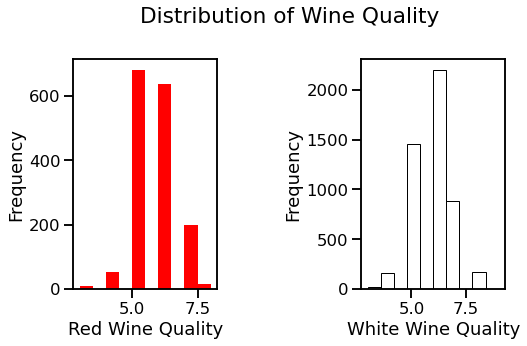

In [1485]:
chemical='quality'
xLabelRed="Red Wine Quality"
xLabelWhite="White Wine Quality"
yLabel="Frequency"
title="Distribution of Wine Quality"

plotChart(redWine, whiteWine,chemical,xLabelRed,xLabelWhite,yLabel,title )



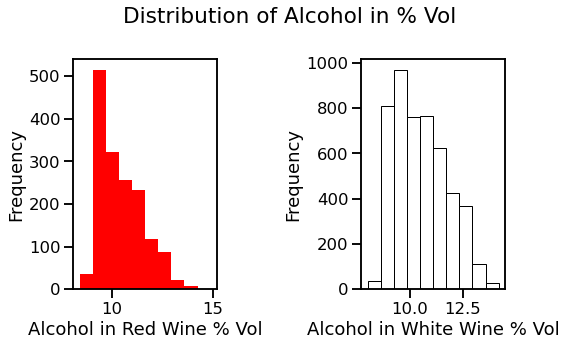

In [1486]:
#Understanding Alcohol 

chemical='alcohol'
xLabelRed="Alcohol in Red Wine % Vol"
xLabelWhite="Alcohol in White Wine % Vol"
yLabel="Frequency"
title="Distribution of Alcohol in % Vol"

plotChart(redWine, whiteWine,chemical,xLabelRed,xLabelWhite,yLabel,title )


As can be observed in the chart above, alcohol levels for both red and white wine are mostly around 9-10%. Very few wines are above 14% in alcohol. 

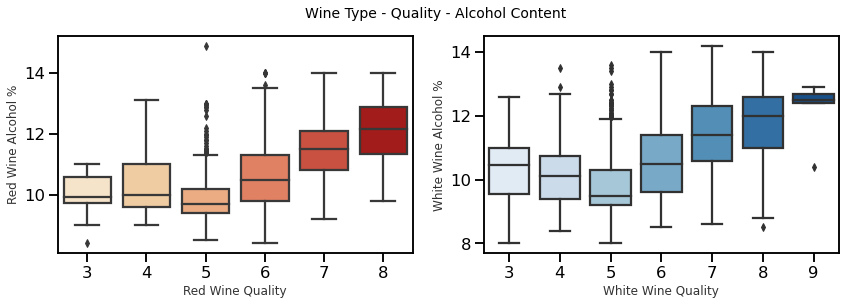

In [1487]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
fig.suptitle('Wine Type - Quality - Alcohol Content', fontsize=14)

sns.boxplot(x='quality', y='alcohol',ax=ax1, data=redWine, palette='OrRd')


ax1.set_xlabel("Red Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Red Wine Alcohol %",size = 12,alpha=0.8)

sns.boxplot(x='quality', y='alcohol', data=whiteWine, ax=ax2, palette='Blues')

ax2.set_xlabel("White Wine Quality",size = 12,alpha=0.8)
ax2.set_ylabel("White Wine Alcohol %",size = 12,alpha=0.8)
plt.show()


From the chart above, it can be obseved that mean alcohol levels are higher for better wine quality rating for both red or white wine. However for average wine quality, outliers in alcohol level can be observed. Perhaps it is harder to discern average wine based on alcohol level.  

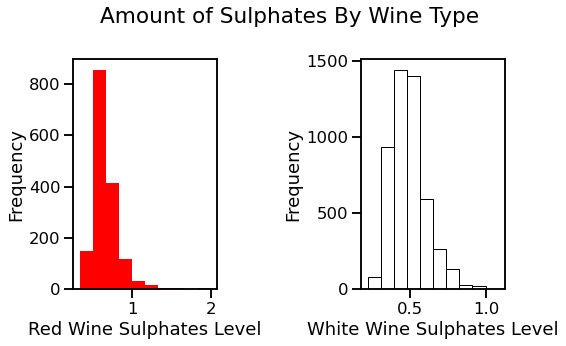

In [1488]:
chemical='sulphates'
xLabelRed="Red Wine Sulphates Level"
xLabelWhite="White Wine Sulphates Level"
yLabel="Frequency"
title="Amount of Sulphates By Wine Type"

plotChart(redWine, whiteWine,chemical, xLabelRed,xLabelWhite,yLabel,title )




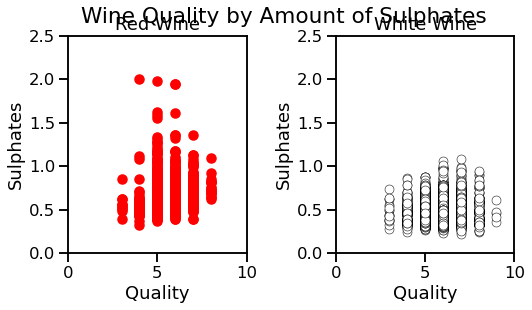

In [1489]:
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

ax[0].scatter(redWine['quality'], redWine["sulphates"], color="red")
ax[1].scatter(whiteWine['quality'], whiteWine['sulphates'], color="white", edgecolors="black", lw=0.5)

ax[0].set_title("Red Wine")
ax[1].set_title("White Wine")
ax[0].set_xlabel("Quality")
ax[1].set_xlabel("Quality")
ax[0].set_ylabel("Sulphates")
ax[1].set_ylabel("Sulphates")
ax[0].set_xlim([0,10])
ax[1].set_xlim([0,10])
ax[0].set_ylim([0,2.5])
ax[1].set_ylim([0,2.5])
fig.subplots_adjust(wspace=0.5)
fig.suptitle("Wine Quality by Amount of Sulphates")

plt.show()

Suplhates are related to the fermentation process of wine and affects the aroma and flavor. However, sulphates has been reported to cause headaches in females more often than males. 

As can be observed from the charts, red wine generally has higher levels of sulphates compared to white wine. 

From the scatter plot, higher quality red and white wines have lower levels of sulphates. 

In [1490]:
subset_attributes = redWine.columns
print(subset_attributes)
rs = round(redWine.loc[:, subset_attributes].describe(),2)
#print(rs)
ws = round(whiteWine.loc[:, subset_attributes].describe(),2)
pd.concat([rs, ws], axis=0, keys=['Red Wine Statistics', 'White Wine Statistics']).T

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


Red Wine Statistics                                    \
                                   count   mean    std   min    25%    50%   
fixed acidity                     1599.0   8.32   1.74  4.60   7.10   7.90   
volatile acidity                  1599.0   0.53   0.18  0.12   0.39   0.52   
citric acid                       1599.0   0.27   0.19  0.00   0.09   0.26   
residual sugar                    1599.0   2.54   1.41  0.90   1.90   2.20   
chlorides                         1599.0   0.09   0.05  0.01   0.07   0.08   
free sulfur dioxide               1599.0  15.87  10.46  1.00   7.00  14.00   
total sulfur dioxide              1599.0  46.47  32.90  6.00  22.00  38.00   
density                           1599.0   1.00   0.00  0.99   1.00   1.00   
pH                                1599.0   3.31   0.15  2.74   3.21   3.31   
sulphates                         1599.0   0.66   0.17  0.33   0.55   0.62   
alcohol                           1599.0  10.42   1.07  8.40   9.50  10.20   
quality                           1599.0   5.64   0.81  3.00   5.00   6.00   

                                    White Wine Statistics                 \
                        75%     max                 count    mean    std   
fixed acidity          9.20   15.90                4898.0    6.85   0.84   
volatile acidity       0.64    1.58                4898.0    0.28   0.10   
citric acid            0.42    1.00                4898.0    0.33   0.12   
residual sugar         2.60   15.50                4898.0    6.39   5.07   
chlorides              0.09    0.61                4898.0    0.05   0.02   
free sulfur dioxide   21.00   72.00                4898.0   35.31  17.01   
total sulfur dioxide  62.00  289.00                4898.0  138.36  42.50   
density                1.00    1.00                4898.0    0.99   0.00   
pH                     3.40    4.01                4898.0    3.19   0.15   
sulphates              0.73    2.00                4898.0    0.49   0.11   
alcohol               11.10   14.90                4898.0   10.51   1.23   
quality                6.00    8.00                4898.0    5.88   0.89   

                                                            
                       min     25%     50%     75%     max  
fixed acidity         3.80    6.30    6.80    7.30   14.20  
volatile acidity      0.08    0.21    0.26    0.32    1.10  
citric acid           0.00    0.27    0.32    0.39    1.66  
residual sugar        0.60    1.70    5.20    9.90   65.80  
chlorides             0.01    0.04    0.04    0.05    0.35  
free sulfur dioxide   2.00   23.00   34.00   46.00  289.00  
total sulfur dioxide  9.00  108.00  134.00  167.00  440.00  
density               0.99    0.99    0.99    1.00    1.04  
pH                    2.72    3.09    3.18    3.28    3.82  
sulphates             0.22    0.41    0.47    0.55    1.08  
alcohol               8.00    9.50   10.40   11.40   14.20  
quality               3.00    5.00    6.00    6.00    9.00

#### Comments From Descriptive Statistics Above:
* Red wine has highter mean values of fixed acidity, volatile acidity and sulphates compared to white wine.
* White wine has higher mean values of residual sugar, free sulphur dioxide, total sulphur dioxide than red wine.
* Alcohol content does not give much variation to distiguish between White and Red Wine. 


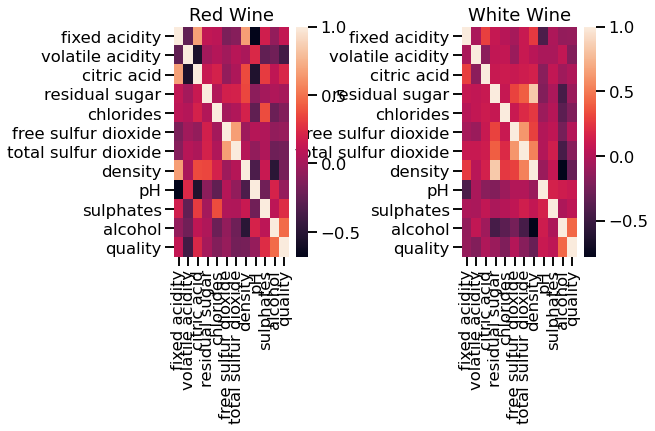

In [1491]:
fig,ax=plt.subplots(1,2)


sns.heatmap(redWine.corr(), xticklabels=redWine.corr().columns.values, yticklabels=redWine.corr().columns.values, ax=ax[0])
ax[0].set_title('Red Wine')
sns.heatmap(whiteWine.corr(), xticklabels=whiteWine.corr().columns.values, yticklabels=whiteWine.corr().columns.values, ax=ax[1])
ax[1].set_title('White Wine')
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.8, hspace=0.05, wspace=1)

plt.show()

#### Comments on Correlations 
* For White Wine, density has relatively high positive correlation with residual sugar, and high negative correlation with alcohol. 
* For Red Wine, alcohol has high positive correlation with quality, and strong negative correlation between density and alcohol level. 
* Generally, free sulphur dioxide and total sulphur dioxide tend to positively correlate. Volatile acidity and citric acid tend to negatively correlate. 

From wine literature, density is generally used as measure of conversion of sugar to alcohol.  So in the case of white wine, the high positive correlation between density and residual sugar and negative correlation with alcohol makes sense as it reflects more conversion of sugar to alcohol. 


### Preprocess Data

This project will be predicting: 
* whether wine sample is red or white wine
* Quality of wine sample

The plan also include trying functional api with two inputs and two outputs for predicting both wine quality and wine type. 

In [1492]:
redWine['type']=1
whiteWine['type']=0
wines=redWine.append(whiteWine, ignore_index=True)

In [1493]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


Create class labels for the wine quality score. 
this is because wine quality score for red wine does not have score 0,1,2,9 and 10.
this missing target label supply no information on what constitutes quality score of 1,2,9 and 10.

hence any multi-class or regression prediction using the original wine quality score will not be able to predict
wine quality score0,1,2,9, and 10.

A better approach is to group quality score into bands as low, average, good. 
3,4- low. 5,6 - average, 7,8 good

Set 'low':0, 'average':1,'good':2

In [1494]:
wines['quality_class']=wines.quality.apply(lambda x: 0 if x<5 else 2 if x>6 else 1) 
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,1


In [1495]:
wines['quality'].value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [1496]:
wines['quality_class'].value_counts()

1    4974
2    1277
0     246
Name: quality_class, dtype: int64

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


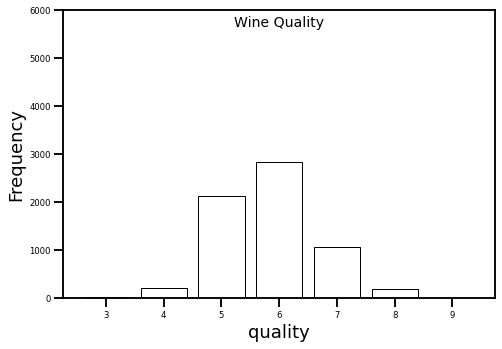

1    4974
2    1277
0     246
Name: quality_class, dtype: int64


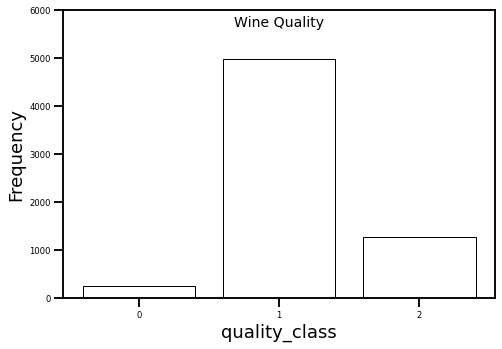

In [1497]:
def plot_winequality(col_selected):
    
    if col_selected=='quality':
        print(wines['quality'].value_counts())
    else:
        print(wines['quality_class'].value_counts())
        
    fig=plt.figure(figsize=(6,4))
    ax= fig.add_axes([0,0,1,1])

    title = fig.suptitle("Wine Quality", fontsize=14)
    #ax.set_title("Combined Wine Quality")
    ax.set_xlabel(col_selected)
    ax.set_ylabel("Frequency") 

    w_q = wines[col_selected].value_counts().sort_index()
    w_q = (list(w_q.index), list(w_q.values))
    ax.set_ylim([0, 6000])
    ax.tick_params(axis='both', which='major', labelsize=8.5)
    ax.bar(list(range(len(w_q[0]))), w_q[1], color='white', 
                   edgecolor='black', linewidth=1, tick_label =w_q[0])

    plt.show()
plot_winequality('quality')
plot_winequality('quality_class')

Although the wine reviewers are allowed to rate wine quality between 0 to 10, in the dataset, there is no rating for 0,1,2 and 10. It is also very clear that based on distribution of wine quality, there are more 'average' wines compared to good or low quality wines. 

This is highly imbalanced dataset. 

In previous two parts of this project, the approach was to look at predicting wine quality as a class labels. This was also the approach when using traditional machine learning as a baseline for comparision. 

But there are two ways to look at the task. One is what was done previously. The other was to look at quality variable as a continous variable between the range of 0 and 10. The task then is a ordinal regression task. It's a type of regression where the relative ordering of the value between the different quality values is significant. 

To stay coherent to prior parts of the project, we will continue to treat wine quality as class labels. And later, add on a separate approach of looking at quality values as continous variables. 

#### Quality Values as Class Labels (after tranformation).

In [1498]:
X=wines.drop(['quality','quality_class'], axis=1)
y=wines['quality_class']

In [1499]:
display(X.head(), y.head())
display(X.shape, y.shape)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


0    1
1    1
2    1
3    1
4    1
Name: quality_class, dtype: int64

(6497, 12)

(6497,)

In [1500]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1501]:
display(X_train.shape, X_test.shape,y_train.shape, y_test.shape)

(5197, 12)

(1300, 12)

(5197,)

(1300,)

#### Preprocess the data


#### Standarization of th data
It has been observed during data exploration that range of max and min values for each attributes are sometimes several magnitudes difference. 

Therefore, standarization is required for the data. StanardScaler is selected as it deals better with outliers. 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)


### Imbalance Data - Red wine and White Wine.
---deal with this. 
### SMOTE For Balancing Data
There is a problem with imbalanced classification because the minority class, in this case Red Wine,is outnumbered by almost three times (4898 white wine samples vs 1599 red wine samples). 

THe approach to solve this problem is to oversample the examples in the minority class. This can be achieved by synthesizing new examples from the minority class in the training dataset prior to fitting a model. This can balance the class distribution but does not provide any additional indormation to the model. 

The technique used here is called Synthetic Minority Oversampling Technique (SMOTE). 


from imblearn.over_sampling import SMOTE 
#import imbalanced-learn python library.
oversample=SMOTE(random_state=42)
X_smote_train,y_smote_train=oversample.fit_resample(X_train,y_train)

sns.countplot(x=y_smote_train)

display(X_smote_train[0:5], X_smote_train.shape)

In [1502]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,1


In [1503]:
X=wines.drop(['quality','quality_class','type'], axis=1)
y=wines.loc[:,['type','quality_class']]


In [1504]:
display(X.head(), y.head())
display(X.shape, y.shape)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


,type,quality_class
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


(6497, 11)

(6497, 2)

In [1505]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1506]:
display(X_train.shape, X_test.shape,y_train.shape, y_test.shape)

(5197, 11)

(1300, 11)

(5197, 2)

(1300, 2)

#### Preprocess the data


#### Standarization of th data
It has been observed during data exploration that range of max and min values for each attributes are sometimes several magnitudes difference. 

Therefore, standarization is required for the data. StanardScaler is selected as it deals better with outliers. 

In [1507]:
X_train.shape

(5197, 11)

In [1508]:
type(X_train)

pandas.core.frame.DataFrame

In [1509]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)


In [1510]:
X_test_scaled.shape

(1300, 11)

Single input, two outputs
For use when evaluating mode:  X_test_scaled, [y_test[type], y_test[quality_class] ]

In [1511]:
X_train_scaled=np.concatenate((X_train_scaled,y_train['type'].to_numpy().reshape(-1,1)),axis=1)
X_train_scaled[0].shape

(12,)

#### Using Random Over Sampling For The Imbalanced Dataset

<AxesSubplot:xlabel='quality_class', ylabel='count'>

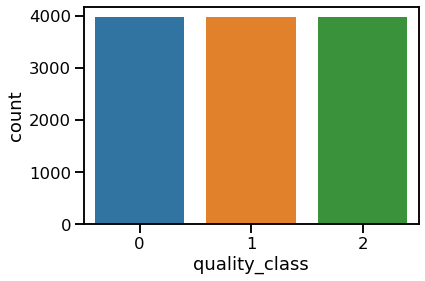

In [1512]:
from imblearn.over_sampling import RandomOverSampler
oversample=RandomOverSampler(sampling_strategy='auto')


X_over_train, y_over_train=oversample.fit_resample(X_train_scaled,y_train['quality_class'])

sns.countplot(x=y_over_train)

#0 is white
#1 is red

In [1513]:
X_over_train.shape #this include the X_over_train[:,11] which is the wine type column 

(11925, 12)

In [1514]:
X_over_train[:,11]

array([0., 1., 1., ..., 0., 0., 0.])

## Experiment 1: Single Input, Multiple Output Complex Neural Network To Classify Both Wine Type and Wine Quality Class 

### Functional API with Multiple Outputs

In [1515]:
%%time
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import Sequential

epoch_set=30
seed = 42
history=[]
m=None

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X_over_train, y_over_train):
    
    
    input_main=tf.keras.layers.Input(shape=(11,),name='InputMain')
    hidden1 = tf.keras.layers.Dense(20, activation="relu", kernel_initializer='he_normal',name='hidden1')(input_main)
                                                        ##kernel_regularizer=tf.keras.regularizers.L2(0.1)
    #hidden1=tf.keras.layers.Dropout(0.5)(hidden1)
    #hidden1=tf.keras.layers.BatchNormalization()(hidden1)

    hidden2 = tf.keras.layers.Dense(20, activation="sigmoid",name='hidden2')(input_main)

#   hidden2=tf.keras.layers.Dropout(0.5)(hidden2)
    #hidden2=tf.keras.layers.BatchNormalization()(hidden2)

    concat = tf.keras.layers.Concatenate(axis=1)([hidden1, hidden2])
#    concat=tf.keras.layers.BatchNormalization()(concat)
#    concat=tf.keras.layers.Dropout(0.5)(concat)

    outputType = tf.keras.layers.Dense(1, name="outputType",activation='sigmoid')(concat)
    outputQuality=tf.keras.layers.Dense(3,activation='softmax',name='outputQuality')(concat)
    #model = tf.keras.Model(inputs=[input_A, input_B], outputs=[outputType, outputQuality])
    model = tf.keras.Model(inputs=[input_main], outputs=[outputType, outputQuality])
    
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
    
    #optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum-0.0)
    #optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01)
    
    
    model.compile(loss=['binary_crossentropy','sparse_categorical_crossentropy' ],
                  optimizer=optimizer,metrics=['binary_accuracy','sparse_categorical_accuracy'])
    
    h = model.fit(X_over_train[train,:11], (X_over_train[train,11], y_over_train[train]),
                    batch_size=32,validation_data=(X_over_train[test,:11],
                                                   [X_over_train[test,11],y_over_train[test]]),
                        epochs=epoch_set,verbose=1)
    
    m=model
    history.append(h)
    
    #because X_over_train include 'type' column which is a target output
    #we can only pass in X_over_train[train,:12] into the input, leaving out the last column which is 'type'

Epoch 1/30
299/299 [==============================] - 1s 2ms/step - loss: 0.8636 - outputType_loss: 0.0601 - outputQuality_loss: 0.8035 - outputType_binary_accuracy: 0.9842 - outputType_sparse_categorical_accuracy: 0.7761 - outputQuality_binary_accuracy: 0.3272 - outputQuality_sparse_categorical_accuracy: 0.6205 - val_loss: 0.7955 - val_outputType_loss: 0.0336 - val_outputQuality_loss: 0.7619 - val_outputType_binary_accuracy: 0.9962 - val_outputType_sparse_categorical_accuracy: 0.7543 - val_outputQuality_binary_accuracy: 0.3262 - val_outputQuality_sparse_categorical_accuracy: 0.6612
Epoch 2/30
299/299 [==============================] - 0s 1ms/step - loss: 0.7527 - outputType_loss: 0.0229 - outputQuality_loss: 0.7298 - outputType_binary_accuracy: 0.9962 - outputType_sparse_categorical_accuracy: 0.7761 - outputQuality_binary_accuracy: 0.3294 - outputQuality_sparse_categorical_accuracy: 0.6724 - val_loss: 0.7663 - val_outputType_loss: 0.0312 - val_outputQuality_loss: 0.7351 - val_outputTy

Epoch 15/30
299/299 [==============================] - 0s 1ms/step - loss: 0.5287 - outputType_loss: 0.0091 - outputQuality_loss: 0.5196 - outputType_binary_accuracy: 0.9976 - outputType_sparse_categorical_accuracy: 0.7761 - outputQuality_binary_accuracy: 0.3319 - outputQuality_sparse_categorical_accuracy: 0.7860 - val_loss: 0.5617 - val_outputType_loss: 0.0182 - val_outputQuality_loss: 0.5435 - val_outputType_binary_accuracy: 0.9966 - val_outputType_sparse_categorical_accuracy: 0.7543 - val_outputQuality_binary_accuracy: 0.3311 - val_outputQuality_sparse_categorical_accuracy: 0.7769
Epoch 16/30
299/299 [==============================] - 0s 1ms/step - loss: 0.5168 - outputType_loss: 0.0086 - outputQuality_loss: 0.5082 - outputType_binary_accuracy: 0.9979 - outputType_sparse_categorical_accuracy: 0.7761 - outputQuality_binary_accuracy: 0.3313 - outputQuality_sparse_categorical_accuracy: 0.7910 - val_loss: 0.5570 - val_outputType_loss: 0.0180 - val_outputQuality_loss: 0.5390 - val_output

Epoch 29/30
299/299 [==============================] - 0s 977us/step - loss: 0.4439 - outputType_loss: 0.0078 - outputQuality_loss: 0.4361 - outputType_binary_accuracy: 0.9978 - outputType_sparse_categorical_accuracy: 0.7761 - outputQuality_binary_accuracy: 0.3326 - outputQuality_sparse_categorical_accuracy: 0.8238 - val_loss: 0.5048 - val_outputType_loss: 0.0144 - val_outputQuality_loss: 0.4904 - val_outputType_binary_accuracy: 0.9962 - val_outputType_sparse_categorical_accuracy: 0.7543 - val_outputQuality_binary_accuracy: 0.3294 - val_outputQuality_sparse_categorical_accuracy: 0.7958
Epoch 30/30
299/299 [==============================] - 0s 982us/step - loss: 0.4478 - outputType_loss: 0.0072 - outputQuality_loss: 0.4405 - outputType_binary_accuracy: 0.9980 - outputType_sparse_categorical_accuracy: 0.7761 - outputQuality_binary_accuracy: 0.3329 - outputQuality_sparse_categorical_accuracy: 0.8239 - val_loss: 0.5397 - val_outputType_loss: 0.0138 - val_outputQuality_loss: 0.5259 - val_ou

Epoch 13/30
299/299 [==============================] - 0s 1ms/step - loss: 0.5705 - outputType_loss: 0.0116 - outputQuality_loss: 0.5590 - outputType_binary_accuracy: 0.9980 - outputType_sparse_categorical_accuracy: 0.7735 - outputQuality_binary_accuracy: 0.3336 - outputQuality_sparse_categorical_accuracy: 0.7638 - val_loss: 0.5939 - val_outputType_loss: 0.0301 - val_outputQuality_loss: 0.5638 - val_outputType_binary_accuracy: 0.9966 - val_outputType_sparse_categorical_accuracy: 0.7648 - val_outputQuality_binary_accuracy: 0.3331 - val_outputQuality_sparse_categorical_accuracy: 0.7585
Epoch 14/30
299/299 [==============================] - 0s 1ms/step - loss: 0.5530 - outputType_loss: 0.0116 - outputQuality_loss: 0.5414 - outputType_binary_accuracy: 0.9980 - outputType_sparse_categorical_accuracy: 0.7735 - outputQuality_binary_accuracy: 0.3327 - outputQuality_sparse_categorical_accuracy: 0.7727 - val_loss: 0.5921 - val_outputType_loss: 0.0321 - val_outputQuality_loss: 0.5601 - val_output

Epoch 27/30
299/299 [==============================] - 0s 965us/step - loss: 0.4666 - outputType_loss: 0.0097 - outputQuality_loss: 0.4569 - outputType_binary_accuracy: 0.9978 - outputType_sparse_categorical_accuracy: 0.7735 - outputQuality_binary_accuracy: 0.3325 - outputQuality_sparse_categorical_accuracy: 0.8136 - val_loss: 0.5242 - val_outputType_loss: 0.0349 - val_outputQuality_loss: 0.4894 - val_outputType_binary_accuracy: 0.9966 - val_outputType_sparse_categorical_accuracy: 0.7648 - val_outputQuality_binary_accuracy: 0.3342 - val_outputQuality_sparse_categorical_accuracy: 0.7891
Epoch 28/30
299/299 [==============================] - 0s 976us/step - loss: 0.4594 - outputType_loss: 0.0091 - outputQuality_loss: 0.4503 - outputType_binary_accuracy: 0.9979 - outputType_sparse_categorical_accuracy: 0.7735 - outputQuality_binary_accuracy: 0.3325 - outputQuality_sparse_categorical_accuracy: 0.8168 - val_loss: 0.5090 - val_outputType_loss: 0.0353 - val_outputQuality_loss: 0.4736 - val_ou

Epoch 11/30
299/299 [==============================] - 0s 1ms/step - loss: 0.5950 - outputType_loss: 0.0107 - outputQuality_loss: 0.5843 - outputType_binary_accuracy: 0.9976 - outputType_sparse_categorical_accuracy: 0.7681 - outputQuality_binary_accuracy: 0.3329 - outputQuality_sparse_categorical_accuracy: 0.7543 - val_loss: 0.5983 - val_outputType_loss: 0.0188 - val_outputQuality_loss: 0.5795 - val_outputType_binary_accuracy: 0.9958 - val_outputType_sparse_categorical_accuracy: 0.7862 - val_outputQuality_binary_accuracy: 0.3293 - val_outputQuality_sparse_categorical_accuracy: 0.7706
Epoch 12/30
299/299 [==============================] - 0s 1ms/step - loss: 0.5851 - outputType_loss: 0.0100 - outputQuality_loss: 0.5751 - outputType_binary_accuracy: 0.9974 - outputType_sparse_categorical_accuracy: 0.7681 - outputQuality_binary_accuracy: 0.3328 - outputQuality_sparse_categorical_accuracy: 0.7580 - val_loss: 0.5809 - val_outputType_loss: 0.0198 - val_outputQuality_loss: 0.5611 - val_output

Epoch 25/30
299/299 [==============================] - 0s 1ms/step - loss: 0.4984 - outputType_loss: 0.0090 - outputQuality_loss: 0.4894 - outputType_binary_accuracy: 0.9983 - outputType_sparse_categorical_accuracy: 0.7681 - outputQuality_binary_accuracy: 0.3333 - outputQuality_sparse_categorical_accuracy: 0.7964 - val_loss: 0.5240 - val_outputType_loss: 0.0171 - val_outputQuality_loss: 0.5069 - val_outputType_binary_accuracy: 0.9966 - val_outputType_sparse_categorical_accuracy: 0.7862 - val_outputQuality_binary_accuracy: 0.3352 - val_outputQuality_sparse_categorical_accuracy: 0.7874
Epoch 26/30
299/299 [==============================] - 0s 1ms/step - loss: 0.4942 - outputType_loss: 0.0090 - outputQuality_loss: 0.4851 - outputType_binary_accuracy: 0.9982 - outputType_sparse_categorical_accuracy: 0.7681 - outputQuality_binary_accuracy: 0.3326 - outputQuality_sparse_categorical_accuracy: 0.8008 - val_loss: 0.5215 - val_outputType_loss: 0.0172 - val_outputQuality_loss: 0.5043 - val_output

Epoch 9/30
299/299 [==============================] - 0s 1ms/step - loss: 0.6174 - outputType_loss: 0.0153 - outputQuality_loss: 0.6021 - outputType_binary_accuracy: 0.9970 - outputType_sparse_categorical_accuracy: 0.7717 - outputQuality_binary_accuracy: 0.3333 - outputQuality_sparse_categorical_accuracy: 0.7423 - val_loss: 0.6651 - val_outputType_loss: 0.0095 - val_outputQuality_loss: 0.6556 - val_outputType_binary_accuracy: 0.9987 - val_outputType_sparse_categorical_accuracy: 0.7719 - val_outputQuality_binary_accuracy: 0.3379 - val_outputQuality_sparse_categorical_accuracy: 0.7048
Epoch 10/30
299/299 [==============================] - 0s 1ms/step - loss: 0.5997 - outputType_loss: 0.0129 - outputQuality_loss: 0.5867 - outputType_binary_accuracy: 0.9976 - outputType_sparse_categorical_accuracy: 0.7717 - outputQuality_binary_accuracy: 0.3350 - outputQuality_sparse_categorical_accuracy: 0.7430 - val_loss: 0.6311 - val_outputType_loss: 0.0086 - val_outputQuality_loss: 0.6225 - val_outputT

Epoch 23/30
299/299 [==============================] - 0s 995us/step - loss: 0.4830 - outputType_loss: 0.0087 - outputQuality_loss: 0.4744 - outputType_binary_accuracy: 0.9977 - outputType_sparse_categorical_accuracy: 0.7717 - outputQuality_binary_accuracy: 0.3331 - outputQuality_sparse_categorical_accuracy: 0.8084 - val_loss: 0.5357 - val_outputType_loss: 0.0080 - val_outputQuality_loss: 0.5277 - val_outputType_binary_accuracy: 0.9992 - val_outputType_sparse_categorical_accuracy: 0.7719 - val_outputQuality_binary_accuracy: 0.3329 - val_outputQuality_sparse_categorical_accuracy: 0.7874
Epoch 24/30
299/299 [==============================] - 0s 1ms/step - loss: 0.4906 - outputType_loss: 0.0081 - outputQuality_loss: 0.4825 - outputType_binary_accuracy: 0.9976 - outputType_sparse_categorical_accuracy: 0.7717 - outputQuality_binary_accuracy: 0.3328 - outputQuality_sparse_categorical_accuracy: 0.8034 - val_loss: 0.5414 - val_outputType_loss: 0.0086 - val_outputQuality_loss: 0.5328 - val_outp

Epoch 7/30
299/299 [==============================] - 0s 998us/step - loss: 0.6509 - outputType_loss: 0.0144 - outputQuality_loss: 0.6365 - outputType_binary_accuracy: 0.9975 - outputType_sparse_categorical_accuracy: 0.7693 - outputQuality_binary_accuracy: 0.3334 - outputQuality_sparse_categorical_accuracy: 0.7304 - val_loss: 0.6648 - val_outputType_loss: 0.0131 - val_outputQuality_loss: 0.6518 - val_outputType_binary_accuracy: 0.9971 - val_outputType_sparse_categorical_accuracy: 0.7816 - val_outputQuality_binary_accuracy: 0.3266 - val_outputQuality_sparse_categorical_accuracy: 0.7166
Epoch 8/30
299/299 [==============================] - 0s 999us/step - loss: 0.6461 - outputType_loss: 0.0135 - outputQuality_loss: 0.6327 - outputType_binary_accuracy: 0.9975 - outputType_sparse_categorical_accuracy: 0.7693 - outputQuality_binary_accuracy: 0.3334 - outputQuality_sparse_categorical_accuracy: 0.7321 - val_loss: 0.6169 - val_outputType_loss: 0.0118 - val_outputQuality_loss: 0.6051 - val_outp

Epoch 21/30
299/299 [==============================] - 0s 1ms/step - loss: 0.5087 - outputType_loss: 0.0078 - outputQuality_loss: 0.5010 - outputType_binary_accuracy: 0.9979 - outputType_sparse_categorical_accuracy: 0.7693 - outputQuality_binary_accuracy: 0.3320 - outputQuality_sparse_categorical_accuracy: 0.7971 - val_loss: 0.5245 - val_outputType_loss: 0.0103 - val_outputQuality_loss: 0.5142 - val_outputType_binary_accuracy: 0.9983 - val_outputType_sparse_categorical_accuracy: 0.7816 - val_outputQuality_binary_accuracy: 0.3305 - val_outputQuality_sparse_categorical_accuracy: 0.7874
Epoch 22/30
299/299 [==============================] - 0s 957us/step - loss: 0.4987 - outputType_loss: 0.0069 - outputQuality_loss: 0.4917 - outputType_binary_accuracy: 0.9983 - outputType_sparse_categorical_accuracy: 0.7693 - outputQuality_binary_accuracy: 0.3311 - outputQuality_sparse_categorical_accuracy: 0.7995 - val_loss: 0.5279 - val_outputType_loss: 0.0108 - val_outputQuality_loss: 0.5171 - val_outp

Model: "functional_866"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
InputMain (InputLayer)          [(None, 11)]         0                                            
__________________________________________________________________________________________________
hidden1 (Dense)                 (None, 20)           240         InputMain[0][0]                  
__________________________________________________________________________________________________
hidden2 (Dense)                 (None, 20)           240         InputMain[0][0]                  
__________________________________________________________________________________________________
concatenate_436 (Concatenate)   (None, 40)           0           hidden1[0][0]                    
                                                                 hidden2[0][0]       

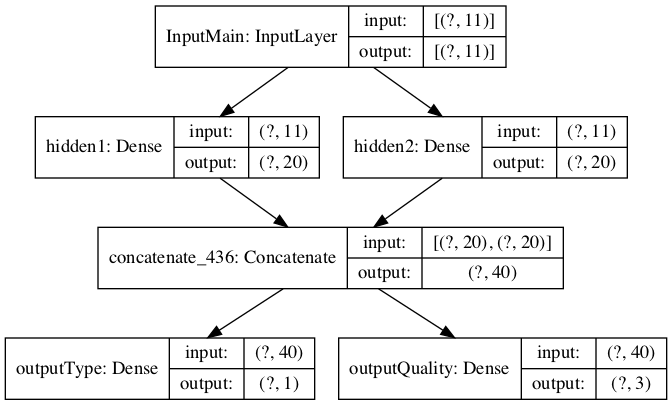

None

In [1516]:
display(plot_model(m,show_shapes=True),model.summary())

In [1517]:
history[0].history

{'loss': [0.8636484146118164,
  0.752679705619812,
  0.7211152911186218,
  0.6964178681373596,
  0.6738792061805725,
  0.6661908030509949,
  0.6392537355422974,
  0.6254055500030518,
  0.6070753931999207,
  0.5905176997184753,
  0.5731176733970642,
  0.566644012928009,
  0.556454598903656,
  0.5440776944160461,
  0.5287479162216187,
  0.5168421864509583,
  0.5113386511802673,
  0.5008312463760376,
  0.49378618597984314,
  0.49136027693748474,
  0.4844447672367096,
  0.47954225540161133,
  0.4771159291267395,
  0.47385406494140625,
  0.461677610874176,
  0.4689846336841583,
  0.4529772400856018,
  0.4595281779766083,
  0.4439314901828766,
  0.4477809965610504],
 'outputType_loss': [0.06013956293463707,
  0.02289040945470333,
  0.018974902108311653,
  0.017079120501875877,
  0.014947653748095036,
  0.013973561115562916,
  0.013719826936721802,
  0.011924582533538342,
  0.010937537997961044,
  0.010738412849605083,
  0.010027285665273666,
  0.010142624378204346,
  0.008682283572852612,
  

In [1518]:
history[0].history.keys()

dict_keys(['loss', 'outputType_loss', 'outputQuality_loss', 'outputType_binary_accuracy', 'outputType_sparse_categorical_accuracy', 'outputQuality_binary_accuracy', 'outputQuality_sparse_categorical_accuracy', 'val_loss', 'val_outputType_loss', 'val_outputQuality_loss', 'val_outputType_binary_accuracy', 'val_outputType_sparse_categorical_accuracy', 'val_outputQuality_binary_accuracy', 'val_outputQuality_sparse_categorical_accuracy'])

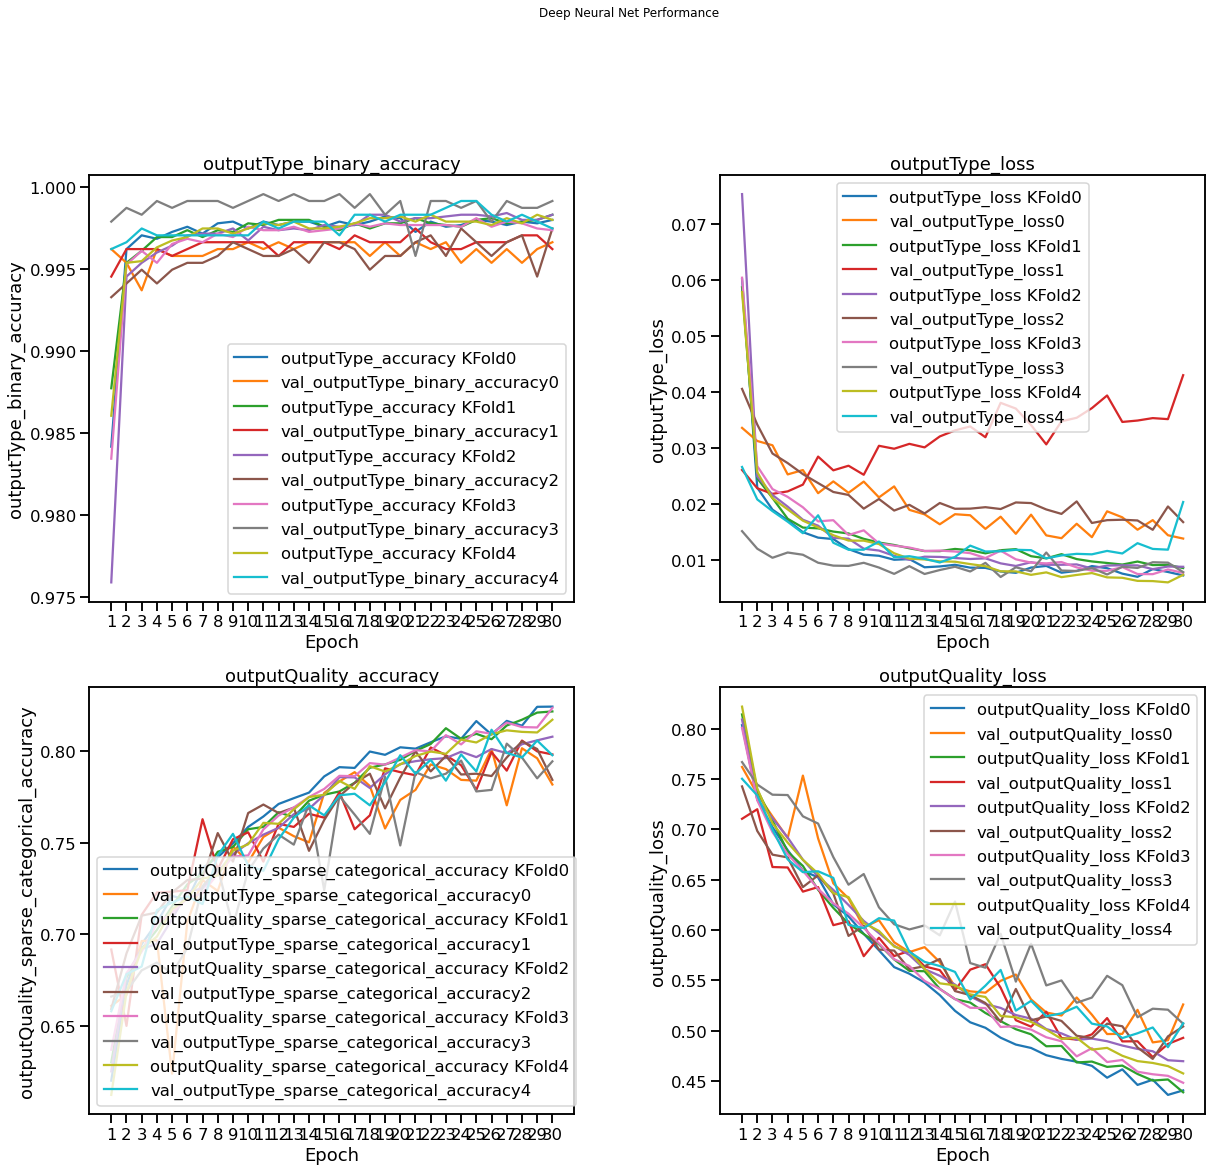

In [1519]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(20, 18))
t = fig.suptitle('Deep Neural Net Performance', fontsize=12)
fig.subplots_adjust(top=0.85, wspace=0.3)

epochs = list(range(1,epoch_set+1))
for i in range(len(history)):
    label="outputType_accuracy KFold"+ str(i)
    label_val='val_outputType_binary_accuracy'+str(i)
    
    ax1.plot(epochs, history[i].history['outputType_binary_accuracy'], label=label)
    ax1.plot(epochs, history[i].history['val_outputType_binary_accuracy'], label=label_val)
    ax1.set_xticks(epochs)
    #ax1.set_ylim([0,1])
    ax1.set_ylabel('outputType_binary_accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_title('outputType_binary_accuracy')
    l1 = ax1.legend(loc="best")
    
    label="outputType_loss KFold"+ str(i)
    label_val='val_outputType_loss'+str(i)
    ax2.plot(epochs, history[i].history['outputType_loss'], label=label)
    ax2.plot(epochs, history[i].history['val_outputType_loss'], label=label_val)

    #ax2.set_ylim([0,1])
    ax2.set_xticks(epochs)
    ax2.set_ylabel('outputType_loss')
    ax2.set_xlabel('Epoch')
    ax2.set_title('outputType_loss')
    l2 = ax2.legend(loc="best")


#for i in range(len(history)):    
    label="outputQuality_sparse_categorical_accuracy KFold"+ str(i)
    label_val='val_outputType_sparse_categorical_accuracy'+str(i)
    ax3.plot(epochs, history[i].history['outputQuality_sparse_categorical_accuracy'], label=label)
    ax3.plot(epochs, history[i].history['val_outputQuality_sparse_categorical_accuracy'], label=label_val)

    #ax3.set_ylim([0,1])
    ax3.set_xticks(epochs)
    ax3.set_ylabel('outputQuality_sparse_categorical_accuracy')
    ax3.set_xlabel('Epoch')
    ax3.set_title('outputQuality_accuracy')
    l2 = ax3.legend(loc="best")
    
    label="outputQuality_loss KFold"+ str(i)
    label_val='val_outputQuality_loss'+str(i)
    
    ax4.plot(epochs, history[i].history['outputQuality_loss'], label=label)
    ax4.plot(epochs, history[i].history['val_outputQuality_loss'], label=label_val)

    #ax4.set_ylim([0,1])
    ax4.set_xticks(epochs)
    ax4.set_ylabel('outputQuality_loss')
    ax4.set_xlabel('Epoch')
    ax4.set_title('outputQuality_loss')
    l2 = ax4.legend(loc="best")
    
#The code below attempt to present less clutttered "averge" picture of the training and validation result.



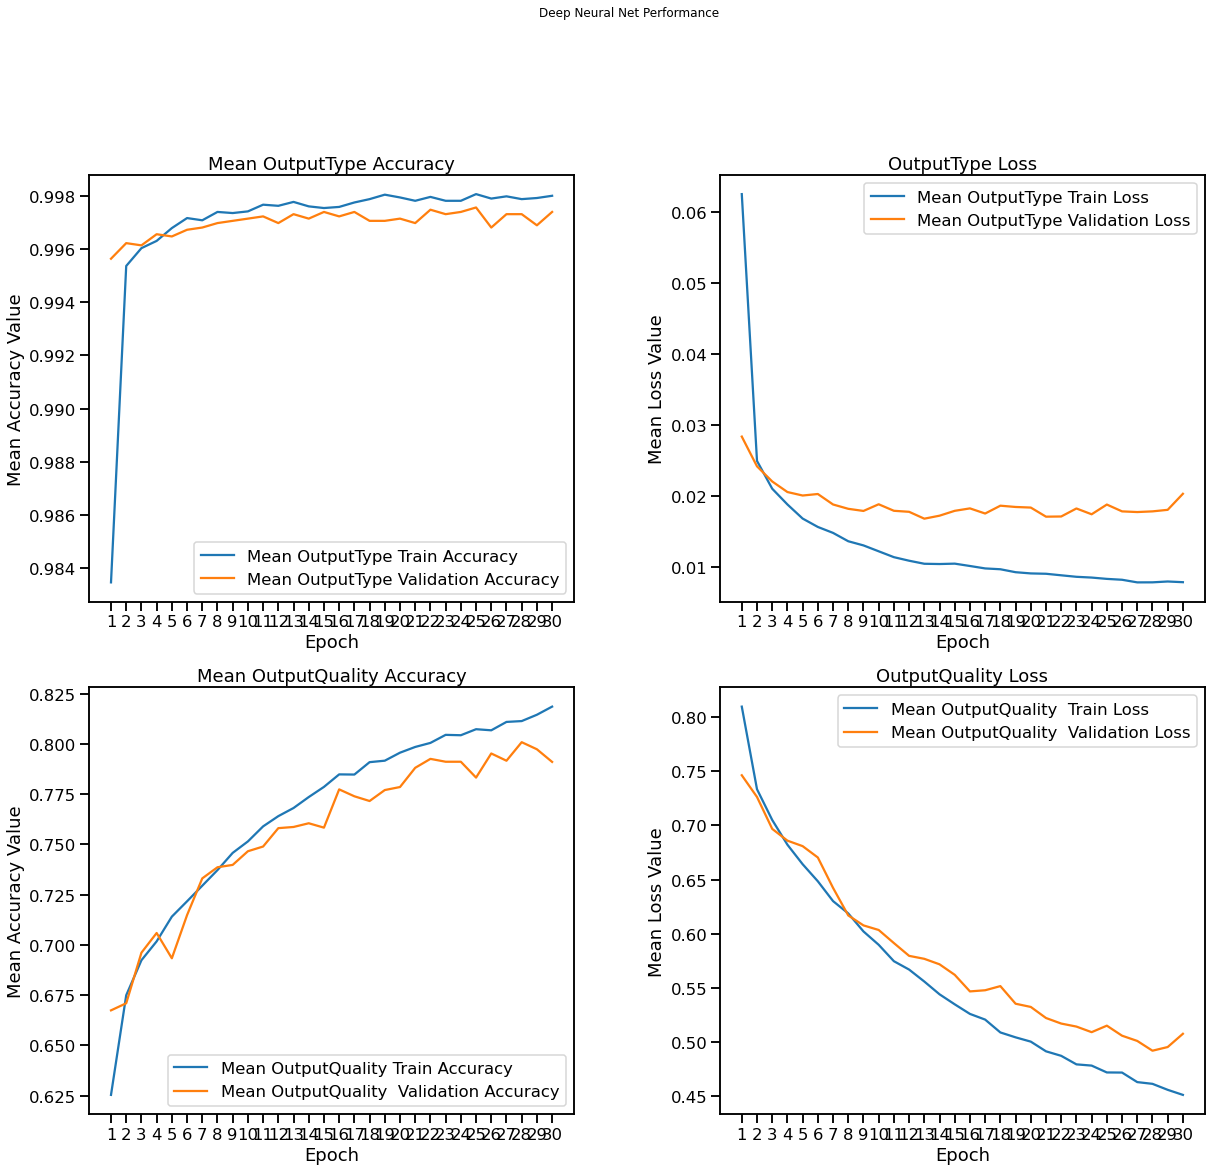

In [1520]:
sca1=[]
vsca1=[]
l1=[]
vl1=[]

sca2=[]
vsca2=[]
l2=[]
vl2=[]

for i in range(len(history)):
    
    sca1.append(np.array(history[i].history['outputType_binary_accuracy']))
    vsca1.append(np.array(history[i].history['val_outputType_binary_accuracy']))
    l1.append(np.array(history[i].history['outputType_loss']))
    vl1.append(np.array(history[i].history['val_outputType_loss']))
    
    
    sca2.append(np.array(history[i].history['outputQuality_sparse_categorical_accuracy']))
    vsca2.append(np.array(history[i].history['val_outputQuality_sparse_categorical_accuracy']))
    l2.append(np.array(history[i].history['outputQuality_loss']))
    vl2.append(np.array(history[i].history['val_outputQuality_loss']))
    
sca1=np.average(sca1,axis=0)
vsca1=np.average(vsca1,axis=0)
l1=np.average(l1,axis=0)
vl1=np.average(vl1,axis=0)

sca2=np.average(sca2,axis=0)
vsca2=np.average(vsca2,axis=0)
l2=np.average(l2,axis=0)
vl2=np.average(vl2,axis=0)


epochs = list(range(1,epoch_set+1))


#plot out the learning curve for each K-fold.

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(20, 18))
t = fig.suptitle('Deep Neural Net Performance', fontsize=12)
fig.subplots_adjust(top=0.85, wspace=0.3)

label="outputType_accuracy KFold"
ax1.plot(epochs, sca1, label='Mean OutputType Train Accuracy' )
ax1.plot(epochs, vsca1, label='Mean OutputType Validation Accuracy')
ax1.set_xticks(epochs)
#ax1.set_ylim([0,1])
ax1.set_ylabel('Mean Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Mean OutputType Accuracy')
le1 = ax1.legend(loc="best")

label="OutputType Loss KFold"
ax2.plot(epochs, l1, label='Mean OutputType Train Loss')
ax2.plot(epochs, vl1, label='Mean OutputType Validation Loss')
ax2.set_xticks(epochs)
#ax2.set_ylim([0,1])
ax2.set_ylabel('Mean Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('OutputType Loss')
le2 = ax2.legend(loc="best")

label="OutputQuality Accuracy KFold"

ax3.plot(epochs, sca2, label='Mean OutputQuality Train Accuracy' )
ax3.plot(epochs, vsca2, label='Mean OutputQuality  Validation Accuracy')
ax3.set_xticks(epochs)
#ax3.set_ylim([0,1])
ax3.set_ylabel('Mean Accuracy Value')
ax3.set_xlabel('Epoch')
ax3.set_title('Mean OutputQuality Accuracy')
le3 = ax3.legend(loc="best")

label="OutputQuality Loss KFold"
ax4.plot(epochs, l2, label='Mean OutputQuality  Train Loss')
ax4.plot(epochs, vl2, label='Mean OutputQuality  Validation Loss')
ax4.set_xticks(epochs)
#ax4.set_ylim([0,1])
ax4.set_ylabel('Mean Loss Value')
ax4.set_xlabel('Epoch')
ax4.set_title('OutputQuality Loss')
le4 = ax4.legend(loc="best")

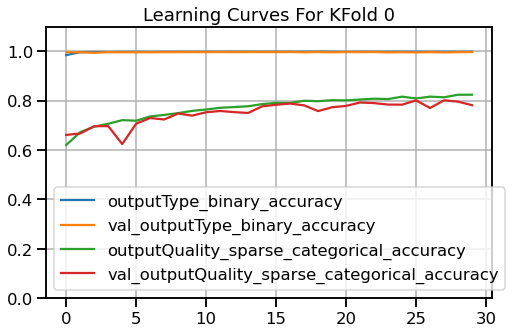

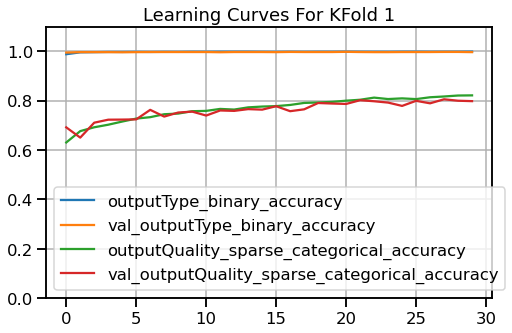

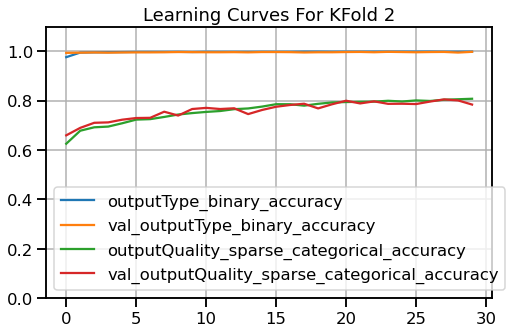

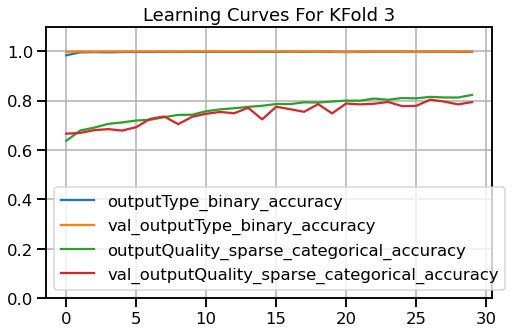

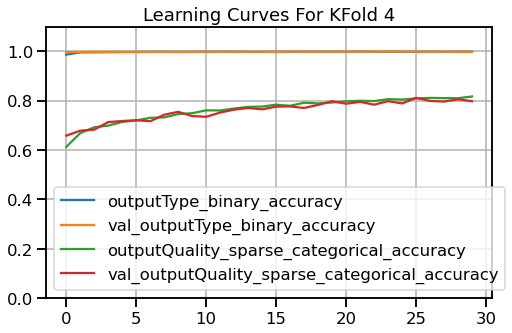

In [1521]:

for i in range(len(history)):

     #pd.DataFrame(history[i].history).plot(figsize=(8, 5))
        
     pd.DataFrame(history[i].history)[['outputType_binary_accuracy','val_outputType_binary_accuracy','outputQuality_sparse_categorical_accuracy','val_outputQuality_sparse_categorical_accuracy']].plot(figsize=(8, 5))
     plt.title('Learning Curves For KFold '+ str(i))
     plt.grid(True)
     plt.gca().set_ylim(0, 1.1) # set the vertical range to [0-1]
     plt.show()

#### Evaluate Performance
X_test_scaled, [y_test[type], y_test[quality_class] ]

In [1522]:
model.evaluate(X_test_scaled, [y_test['type'], y_test['quality_class'] ])

41/41 [==============================] - 0s 1ms/step - loss: 0.8758 - outputType_loss: 0.0490 - outputQuality_loss: 0.8268 - outputType_binary_accuracy: 0.9915 - outputType_sparse_categorical_accuracy: 0.7377 - outputQuality_binary_accuracy: 0.2759 - outputQuality_sparse_categorical_accuracy: 0.6423


[0.875840425491333,
 0.049039240926504135,
 0.8268011212348938,
 0.9915384650230408,
 0.7376922965049744,
 0.27589744329452515,
 0.642307698726654]

In [1523]:
from sklearn.metrics import confusion_matrix, f1_score, cohen_kappa_score,classification_report
y_pred_1,y_pred_2 = model.predict( X_test_scaled)

In [1524]:
display(y_pred_1.shape, y_pred_2.shape)

(1300, 1)

(1300, 3)

In [1525]:
#y_pred_2 is contains the class probabilities of each class for each examples. 
#need to convert to class prediction

y_pred_2_class=[np.argmax(i) for i in y_pred_2]
y_pred_2_class[0:5]

[2, 1, 2, 1, 1]

In [1526]:
#convert y_pred_1 into class labels.
display(y_pred_1[0:5])
y_pred_1_class=[1 if i>0.5 else 0 for i in y_pred_1]
y_pred_1_class[0:5]

array([[3.6634463e-12],
       [9.6952027e-01],
       [3.0806065e-03],
       [8.4542684e-09],
       [3.1468372e-07]], dtype=float32)

[0, 1, 0, 0, 0]

### Evaluate Model's Classification Performance For WIne Quality

In [1527]:
confusion_matrix(y_test['quality_class'], y_pred_2_class)



array([[ 27,  16,   6],
       [109, 601, 289],
       [ 12,  33, 207]])

In [1528]:
def plot_consfusionmatrix(actual,predict):
    cm = confusion_matrix(actual, predict)
    sns.set_context('talk')
    ax = sns.heatmap(cm, annot=True, fmt='d')
    labels = ['low', 'average','good']
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    #print(cm)
    print('Confusion Matrxi Of Test Set:') 




Confusion Matrxi Of Test Set:
              precision    recall  f1-score   support

           0       0.18      0.55      0.27        49
           1       0.92      0.60      0.73       999
           2       0.41      0.82      0.55       252

    accuracy                           0.64      1300
   macro avg       0.51      0.66      0.52      1300
weighted avg       0.80      0.64      0.68      1300



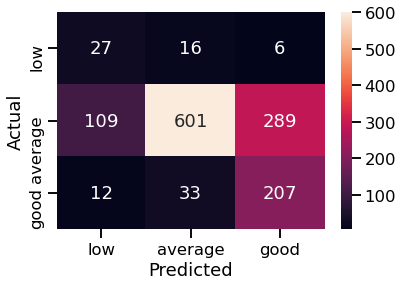

In [1529]:
plot_consfusionmatrix(y_test['quality_class'],y_pred_2_class) 
print(classification_report(y_test['quality_class'],y_pred_2_class))




### Evaluate Model's Classification Performance For Wine Type 



In [1530]:
def plot_consfusionmatrix_wineType(actual,predict):
    cm = confusion_matrix(actual, predict)
    sns.set_context('talk')
    ax = sns.heatmap(cm, annot=True, fmt='d')
    labels = ['White Wine','Red Wine']
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    #print(cm)
    print('Confusion Matrxi Of Test Set:') 




Confusion Matrxi Of Test Set:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       959
           1       0.99      0.98      0.98       341

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



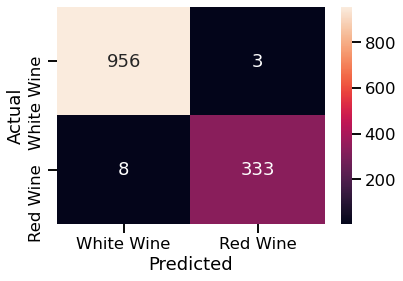

In [1531]:
confusion_matrix(y_test['type'], y_pred_1_class)

plot_consfusionmatrix_wineType(y_test['type'], y_pred_1_class) 
print(classification_report(y_test['type'], y_pred_1_class))

In [1476]:
model.metrics_names

['loss',
 'outputType_loss',
 'outputQuality_loss',
 'outputType_binary_accuracy',
 'outputType_sparse_categorical_accuracy',
 'outputQuality_binary_accuracy',
 'outputQuality_sparse_categorical_accuracy']

## Experiment 2 : Multiple Input, Multiple Output Complex Neural Network To Classify Both Wine Type and Wine Quality Class



### Building Neural Network With Multiple Inputs And Multiple Outputs

#### Preprocessing the preparing the input data

In [495]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,quality_class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,1


**Preparing the two inputs** 

In [496]:
X_input1=wines.drop(['quality','quality_class','type'],axis=1)
y_input1=wines['type']

In [497]:
X_input2=wines.drop(['type','quality','quality_class'],axis=1)
y_input2=wines['quality_class']

In [498]:
display( X_input1.shape, y_input1.shape,X_input2.shape,y_input2.shape)

(6497, 11)

(6497,)

(6497, 11)

(6497,)

#### Scale the inputs and balance the data

In [499]:
#For Input 1
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_input1, y_input1, test_size=0.2, random_state=42)

In [500]:
#for Input2
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_input2, y_input2, test_size=0.2, random_state=42)

In [501]:
#Apply to Input 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_1_train)
X_1_train_scaled = scaler.transform(X_1_train)

X_1_test_scaled = scaler.transform(X_1_test)


In [502]:
#Apply to Input2
scaler = StandardScaler().fit(X_2_train)
X_2_train_scaled = scaler.transform(X_2_train)

X_2_test_scaled = scaler.transform(X_2_test)



In [665]:
display(y_1_test.value_counts(),y_2_test.value_counts())

0    959
1    341
Name: type, dtype: int64

1    999
2    252
0     49
Name: quality_class, dtype: int64

#### Balancing The Data Using SMOTE

<AxesSubplot:xlabel='type', ylabel='count'>

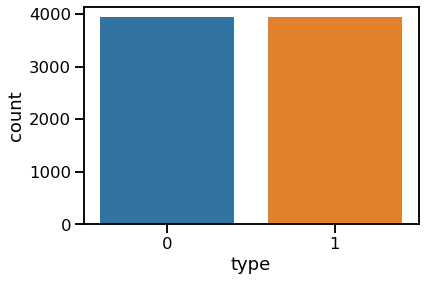

In [503]:
from imblearn.over_sampling import SMOTE 
#import imbalanced-learn python library.

#Input 1
oversample=SMOTE(random_state=42)
X_1_smote_train,y_1_smote_train=oversample.fit_resample(X_1_train_scaled,y_1_train)

sns.countplot(x=y_1_smote_train)

<AxesSubplot:xlabel='quality_class', ylabel='count'>

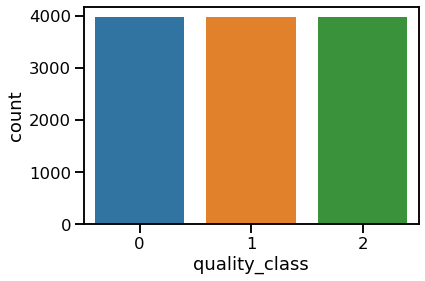

In [504]:
#Input 2
oversample=SMOTE(random_state=42)
X_2_smote_train,y_2_smote_train=oversample.fit_resample(X_2_train_scaled,y_2_train)

sns.countplot(x=y_2_smote_train)

#### Essentially These Constiutes The Two Inputs Data:

**Input 1 :**
X_1_smote_train,y_1_smote_train, X_1_test_scaled,y_1_test


**Input 2 :**
X_2_smote_train,y_2_smote_train, X_2_test_scaled, y_2_test

In [505]:
X_1_smote_train.shape

(7878, 11)

In [1397]:
%%time
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras import Sequential

epoch_set=30
seed = 42
history=[]
m=None



def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1**(epoch / s)
    return exponential_decay_fn


kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
for train, test in kfold.split(X_1_smote_train, y_1_smote_train):
    
    
    input_A = tf.keras.layers.Input(shape=(11,), name="Wine_Input_Type")
    input_B = tf.keras.layers.Input(shape=(11,), name="Wine_Input_Quality")

    hidden1 = tf.keras.layers.Dense(20, activation="relu",kernel_initializer='he_normal',
                                    kernel_regularizer=tf.keras.regularizers.L2(0.1),name='hidden1')(input_A)
                                    ##kernel_regularizer=tf.keras.regularizers.L2(0.1)
    hidden1=tf.keras.layers.Dropout(0.5)(hidden1)
    hidden2 = tf.keras.layers.Dense(128, activation="relu",kernel_initializer='he_normal',
                                     kernel_regularizer=tf.keras.regularizers.L2(0.1),name='hidden2')(input_B)
    hidden2=tf.keras.layers.BatchNormalization()(hidden2)
    hidden2=tf.keras.layers.Dropout(0.5)(hidden2)


    #     hidden2 = tf.keras.layers.Dense(6, activation="relu",kernel_initializer='he_normal',
#                                     kernel_regularizer=tf.keras.regularizers.L1(0.1),name='hidden2')(input_B)
#     hidden2=tf.keras.layers.Dropout(0.5)(hidden2)
    #hidden2=tf.keras.layers.BatchNormalization()(hidden2)
    
    concat = tf.keras.layers.Concatenate(axis=1)([hidden1, hidden2])
    
#    hidden3 = tf.keras.layers.Dense(1024, activation="relu",kernel_initializer='he_normal',
#                                    kernel_regularizer=tf.keras.regularizers.L2(0.1),
#                                     name='hidden3')(concat)
#    hidden3=tf.keras.layers.BatchNormalization()(hidden3)
#    hidden3=tf.keras.layers.Dropout(0.2)(hidden3)



#    hidden4 = tf.keras.layers.Dense(128, activation="relu",kernel_initializer='he_normal',
#                                    kernel_regularizer=tf.keras.regularizers.L2(0.1),
#                                     name='hidden4')(hidden3)
#    hidden4=tf.keras.layers.Dropout(0.5)(hidden4)
#     hidden3=tf.keras.layers.BatchNormalization()(hidden3)
#     hidden4 = tf.keras.layers.Dense(64, activation="relu",kernel_initializer='he_normal',
#                                     name='hidden4')(hidden3)
#     hidden4=tf.keras.layers.Dropout(0.5)(hidden4)
#     hidden4=tf.keras.layers.BatchNormalization()(hidden4)
    
    
    outputType = tf.keras.layers.Dense(1, name="outputType",activation='sigmoid')(concat)
    outputQuality=tf.keras.layers.Dense(3,activation='softmax',name='outputQuality')(concat)
    #model = tf.keras.Model(inputs=[input_A, input_B], outputs=[outputType, outputQuality])
    model = tf.keras.Model(inputs=[input_A,input_B], outputs=[outputType, outputQuality])
    
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
    exponential_decay_fn = exponential_decay(lr0=0.01, s=1)
    lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)
    
    #optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum-0.0)
    #optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01)

    model.compile(loss=['binary_crossentropy','sparse_categorical_crossentropy' ],
                  optimizer=optimizer,metrics=['binary_accuracy','sparse_categorical_accuracy'])
    
    h = model.fit((X_1_smote_train[train,:11],X_2_smote_train[train,:11]), 
                  (y_1_smote_train[train], y_2_smote_train[train]),
                    batch_size=32,
                  validation_data=((X_1_smote_train[test,:11],X_2_smote_train[test,:11]),(y_1_smote_train[test],y_2_smote_train[test])),
                        epochs=epoch_set,verbose=1,
                 callbacks=[lr_scheduler])
    
    m=model
    history.append(h)
    
    #because X_over_train include 'type' column which is a target output
    #we can only pass in X_over_train[train,:12] into the input, leaving out the last column which is 'type'a

Epoch 1/30
197/197 [==============================] - 0s 2ms/step - loss: 4.9380 - outputType_loss: 0.2231 - outputQuality_loss: 0.7437 - outputType_binary_accuracy: 0.9169 - outputType_sparse_categorical_accuracy: 0.5000 - outputQuality_binary_accuracy: 0.4073 - outputQuality_sparse_categorical_accuracy: 0.6949 - val_loss: 1.0241 - val_outputType_loss: 0.1015 - val_outputQuality_loss: 0.7256 - val_outputType_binary_accuracy: 0.9791 - val_outputType_sparse_categorical_accuracy: 0.5000 - val_outputQuality_binary_accuracy: 0.4063 - val_outputQuality_sparse_categorical_accuracy: 0.7081
Epoch 2/30
197/197 [==============================] - 0s 1ms/step - loss: 0.8128 - outputType_loss: 0.1018 - outputQuality_loss: 0.5701 - outputType_binary_accuracy: 0.9752 - outputType_sparse_categorical_accuracy: 0.5000 - outputQuality_binary_accuracy: 0.4094 - outputQuality_sparse_categorical_accuracy: 0.7658 - val_loss: 0.8212 - val_outputType_loss: 0.0864 - val_outputQuality_loss: 0.6260 - val_outputTy

Epoch 15/30
197/197 [==============================] - 0s 1ms/step - loss: 0.7405 - outputType_loss: 0.0940 - outputQuality_loss: 0.5448 - outputType_binary_accuracy: 0.9786 - outputType_sparse_categorical_accuracy: 0.5000 - outputQuality_binary_accuracy: 0.4080 - outputQuality_sparse_categorical_accuracy: 0.7758 - val_loss: 0.6930 - val_outputType_loss: 0.0768 - val_outputQuality_loss: 0.5145 - val_outputType_binary_accuracy: 0.9867 - val_outputType_sparse_categorical_accuracy: 0.5000 - val_outputQuality_binary_accuracy: 0.4067 - val_outputQuality_sparse_categorical_accuracy: 0.7817
Epoch 16/30
197/197 [==============================] - 0s 1ms/step - loss: 0.7394 - outputType_loss: 0.0940 - outputQuality_loss: 0.5437 - outputType_binary_accuracy: 0.9787 - outputType_sparse_categorical_accuracy: 0.5000 - outputQuality_binary_accuracy: 0.4104 - outputQuality_sparse_categorical_accuracy: 0.7728 - val_loss: 0.6932 - val_outputType_loss: 0.0769 - val_outputQuality_loss: 0.5145 - val_output

Epoch 29/30
197/197 [==============================] - 0s 1ms/step - loss: 0.7392 - outputType_loss: 0.0976 - outputQuality_loss: 0.5399 - outputType_binary_accuracy: 0.9759 - outputType_sparse_categorical_accuracy: 0.5000 - outputQuality_binary_accuracy: 0.4087 - outputQuality_sparse_categorical_accuracy: 0.7767 - val_loss: 0.6932 - val_outputType_loss: 0.0769 - val_outputQuality_loss: 0.5146 - val_outputType_binary_accuracy: 0.9867 - val_outputType_sparse_categorical_accuracy: 0.5000 - val_outputQuality_binary_accuracy: 0.4067 - val_outputQuality_sparse_categorical_accuracy: 0.7811
Epoch 30/30
197/197 [==============================] - 0s 1ms/step - loss: 0.7467 - outputType_loss: 0.0931 - outputQuality_loss: 0.5519 - outputType_binary_accuracy: 0.9797 - outputType_sparse_categorical_accuracy: 0.5000 - outputQuality_binary_accuracy: 0.4077 - outputQuality_sparse_categorical_accuracy: 0.7704 - val_loss: 0.6932 - val_outputType_loss: 0.0768 - val_outputQuality_loss: 0.5146 - val_output

Epoch 13/30
197/197 [==============================] - 0s 1ms/step - loss: 0.7406 - outputType_loss: 0.0940 - outputQuality_loss: 0.5456 - outputType_binary_accuracy: 0.9822 - outputType_sparse_categorical_accuracy: 0.5000 - outputQuality_binary_accuracy: 0.4047 - outputQuality_sparse_categorical_accuracy: 0.7726 - val_loss: 0.6769 - val_outputType_loss: 0.0742 - val_outputQuality_loss: 0.5018 - val_outputType_binary_accuracy: 0.9854 - val_outputType_sparse_categorical_accuracy: 0.5000 - val_outputQuality_binary_accuracy: 0.4162 - val_outputQuality_sparse_categorical_accuracy: 0.8090
Epoch 14/30
197/197 [==============================] - 0s 1ms/step - loss: 0.7458 - outputType_loss: 0.0955 - outputQuality_loss: 0.5494 - outputType_binary_accuracy: 0.9792 - outputType_sparse_categorical_accuracy: 0.5000 - outputQuality_binary_accuracy: 0.4038 - outputQuality_sparse_categorical_accuracy: 0.7683 - val_loss: 0.6773 - val_outputType_loss: 0.0742 - val_outputQuality_loss: 0.5022 - val_output

Epoch 27/30
197/197 [==============================] - 0s 1ms/step - loss: 0.7424 - outputType_loss: 0.0917 - outputQuality_loss: 0.5498 - outputType_binary_accuracy: 0.9816 - outputType_sparse_categorical_accuracy: 0.5000 - outputQuality_binary_accuracy: 0.4046 - outputQuality_sparse_categorical_accuracy: 0.7701 - val_loss: 0.6774 - val_outputType_loss: 0.0742 - val_outputQuality_loss: 0.5023 - val_outputType_binary_accuracy: 0.9854 - val_outputType_sparse_categorical_accuracy: 0.5000 - val_outputQuality_binary_accuracy: 0.4156 - val_outputQuality_sparse_categorical_accuracy: 0.8147
Epoch 28/30
197/197 [==============================] - 0s 1ms/step - loss: 0.7486 - outputType_loss: 0.0931 - outputQuality_loss: 0.5546 - outputType_binary_accuracy: 0.9803 - outputType_sparse_categorical_accuracy: 0.5000 - outputQuality_binary_accuracy: 0.4051 - outputQuality_sparse_categorical_accuracy: 0.7637 - val_loss: 0.6769 - val_outputType_loss: 0.0742 - val_outputQuality_loss: 0.5018 - val_output

Epoch 11/30
197/197 [==============================] - 0s 1ms/step - loss: 0.7560 - outputType_loss: 0.0983 - outputQuality_loss: 0.5556 - outputType_binary_accuracy: 0.9792 - outputType_sparse_categorical_accuracy: 0.5000 - outputQuality_binary_accuracy: 0.4066 - outputQuality_sparse_categorical_accuracy: 0.7715 - val_loss: 0.6549 - val_outputType_loss: 0.0538 - val_outputQuality_loss: 0.4989 - val_outputType_binary_accuracy: 0.9949 - val_outputType_sparse_categorical_accuracy: 0.5000 - val_outputQuality_binary_accuracy: 0.4114 - val_outputQuality_sparse_categorical_accuracy: 0.8027
Epoch 12/30
197/197 [==============================] - 0s 1ms/step - loss: 0.7641 - outputType_loss: 0.1022 - outputQuality_loss: 0.5598 - outputType_binary_accuracy: 0.9768 - outputType_sparse_categorical_accuracy: 0.5000 - outputQuality_binary_accuracy: 0.4078 - outputQuality_sparse_categorical_accuracy: 0.7744 - val_loss: 0.6547 - val_outputType_loss: 0.0539 - val_outputQuality_loss: 0.4987 - val_output

Epoch 25/30
197/197 [==============================] - 0s 1ms/step - loss: 0.7612 - outputType_loss: 0.0993 - outputQuality_loss: 0.5598 - outputType_binary_accuracy: 0.9781 - outputType_sparse_categorical_accuracy: 0.5000 - outputQuality_binary_accuracy: 0.4062 - outputQuality_sparse_categorical_accuracy: 0.7698 - val_loss: 0.6549 - val_outputType_loss: 0.0539 - val_outputQuality_loss: 0.4989 - val_outputType_binary_accuracy: 0.9949 - val_outputType_sparse_categorical_accuracy: 0.5000 - val_outputQuality_binary_accuracy: 0.4101 - val_outputQuality_sparse_categorical_accuracy: 0.8027
Epoch 26/30
197/197 [==============================] - 0s 1ms/step - loss: 0.7636 - outputType_loss: 0.1025 - outputQuality_loss: 0.5590 - outputType_binary_accuracy: 0.9757 - outputType_sparse_categorical_accuracy: 0.5000 - outputQuality_binary_accuracy: 0.4062 - outputQuality_sparse_categorical_accuracy: 0.7791 - val_loss: 0.6550 - val_outputType_loss: 0.0538 - val_outputQuality_loss: 0.4990 - val_output

Epoch 9/30
197/197 [==============================] - 0s 1ms/step - loss: 0.7314 - outputType_loss: 0.0924 - outputQuality_loss: 0.5399 - outputType_binary_accuracy: 0.9833 - outputType_sparse_categorical_accuracy: 0.4999 - outputQuality_binary_accuracy: 0.4087 - outputQuality_sparse_categorical_accuracy: 0.7782 - val_loss: 0.6599 - val_outputType_loss: 0.0695 - val_outputQuality_loss: 0.4913 - val_outputType_binary_accuracy: 0.9886 - val_outputType_sparse_categorical_accuracy: 0.5003 - val_outputQuality_binary_accuracy: 0.4083 - val_outputQuality_sparse_categorical_accuracy: 0.7943
Epoch 10/30
197/197 [==============================] - 0s 1ms/step - loss: 0.7312 - outputType_loss: 0.0913 - outputQuality_loss: 0.5408 - outputType_binary_accuracy: 0.9811 - outputType_sparse_categorical_accuracy: 0.4999 - outputQuality_binary_accuracy: 0.4084 - outputQuality_sparse_categorical_accuracy: 0.7771 - val_loss: 0.6602 - val_outputType_loss: 0.0692 - val_outputQuality_loss: 0.4919 - val_outputT

Epoch 23/30
197/197 [==============================] - 0s 2ms/step - loss: 0.7283 - outputType_loss: 0.0933 - outputQuality_loss: 0.5358 - outputType_binary_accuracy: 0.9808 - outputType_sparse_categorical_accuracy: 0.4999 - outputQuality_binary_accuracy: 0.4092 - outputQuality_sparse_categorical_accuracy: 0.7772 - val_loss: 0.6604 - val_outputType_loss: 0.0695 - val_outputQuality_loss: 0.4918 - val_outputType_binary_accuracy: 0.9886 - val_outputType_sparse_categorical_accuracy: 0.5003 - val_outputQuality_binary_accuracy: 0.4078 - val_outputQuality_sparse_categorical_accuracy: 0.7943
Epoch 24/30
197/197 [==============================] - 0s 1ms/step - loss: 0.7328 - outputType_loss: 0.0939 - outputQuality_loss: 0.5398 - outputType_binary_accuracy: 0.9824 - outputType_sparse_categorical_accuracy: 0.4999 - outputQuality_binary_accuracy: 0.4092 - outputQuality_sparse_categorical_accuracy: 0.7717 - val_loss: 0.6599 - val_outputType_loss: 0.0693 - val_outputQuality_loss: 0.4914 - val_output

Epoch 7/30
197/197 [==============================] - 0s 1ms/step - loss: 0.7534 - outputType_loss: 0.0948 - outputQuality_loss: 0.5584 - outputType_binary_accuracy: 0.9789 - outputType_sparse_categorical_accuracy: 0.5001 - outputQuality_binary_accuracy: 0.4064 - outputQuality_sparse_categorical_accuracy: 0.7611 - val_loss: 0.6726 - val_outputType_loss: 0.0744 - val_outputQuality_loss: 0.4980 - val_outputType_binary_accuracy: 0.9879 - val_outputType_sparse_categorical_accuracy: 0.4997 - val_outputQuality_binary_accuracy: 0.4093 - val_outputQuality_sparse_categorical_accuracy: 0.7924
Epoch 8/30
197/197 [==============================] - 0s 1ms/step - loss: 0.7502 - outputType_loss: 0.0930 - outputQuality_loss: 0.5569 - outputType_binary_accuracy: 0.9794 - outputType_sparse_categorical_accuracy: 0.5001 - outputQuality_binary_accuracy: 0.4077 - outputQuality_sparse_categorical_accuracy: 0.7663 - val_loss: 0.6727 - val_outputType_loss: 0.0745 - val_outputQuality_loss: 0.4980 - val_outputTy

Epoch 21/30
197/197 [==============================] - 0s 1ms/step - loss: 0.7552 - outputType_loss: 0.0918 - outputQuality_loss: 0.5633 - outputType_binary_accuracy: 0.9783 - outputType_sparse_categorical_accuracy: 0.5001 - outputQuality_binary_accuracy: 0.4073 - outputQuality_sparse_categorical_accuracy: 0.7596 - val_loss: 0.6727 - val_outputType_loss: 0.0745 - val_outputQuality_loss: 0.4980 - val_outputType_binary_accuracy: 0.9879 - val_outputType_sparse_categorical_accuracy: 0.4997 - val_outputQuality_binary_accuracy: 0.4089 - val_outputQuality_sparse_categorical_accuracy: 0.7924
Epoch 22/30
197/197 [==============================] - 0s 1ms/step - loss: 0.7510 - outputType_loss: 0.0941 - outputQuality_loss: 0.5568 - outputType_binary_accuracy: 0.9794 - outputType_sparse_categorical_accuracy: 0.5001 - outputQuality_binary_accuracy: 0.4073 - outputQuality_sparse_categorical_accuracy: 0.7706 - val_loss: 0.6727 - val_outputType_loss: 0.0745 - val_outputQuality_loss: 0.4981 - val_output

Model: "functional_836"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Wine_Input_Quality (InputLayer) [(None, 11)]         0                                            
__________________________________________________________________________________________________
Wine_Input_Type (InputLayer)    [(None, 11)]         0                                            
__________________________________________________________________________________________________
hidden2 (Dense)                 (None, 128)          1536        Wine_Input_Quality[0][0]         
__________________________________________________________________________________________________
hidden1 (Dense)                 (None, 20)           240         Wine_Input_Type[0][0]            
_____________________________________________________________________________________

[(None, 1), (None, 3)]

None

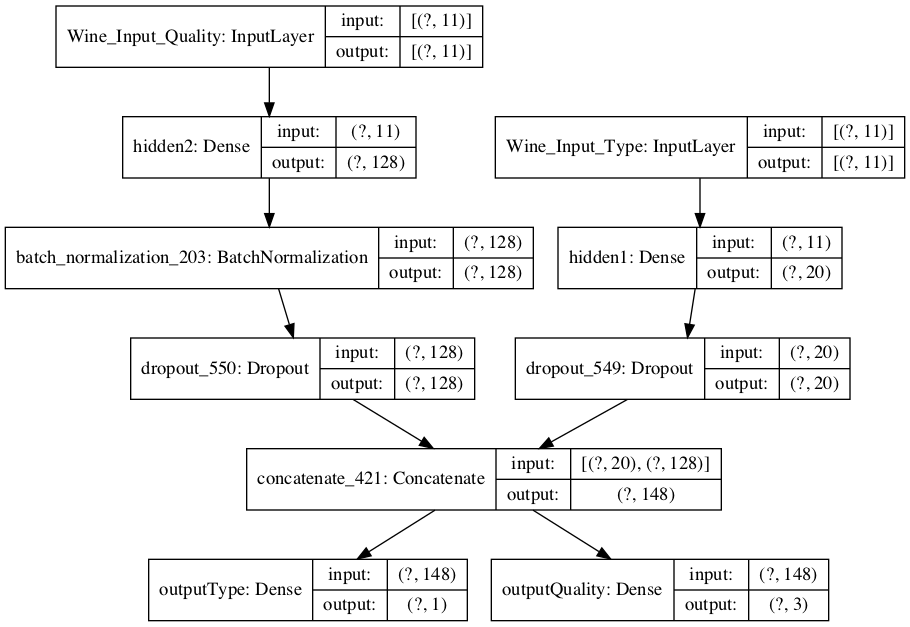

In [1398]:
display(model.output_shape, model.summary())

plot_model(model, show_shapes=True)

In [1399]:
# to check proportion of weights which are zero. 
for layer in model.layers:
    weights = layer.get_weights()
    print(layer.output,weights)

Tensor("Wine_Input_Quality_306:0", shape=(None, 11), dtype=float32) []
Tensor("Wine_Input_Type_306:0", shape=(None, 11), dtype=float32) []
Tensor("hidden2/Relu_308:0", shape=(None, 128), dtype=float32) [array([[-0.00418934, -0.01981772, -0.00119118, ...,  0.01455414,
         0.00018318,  0.02447398],
       [-0.00525353, -0.00151929, -0.03377495, ..., -0.00230611,
        -0.00117347, -0.02703095],
       [-0.00394056,  0.01276388,  0.00514896, ...,  0.00618725,
        -0.00354238,  0.05249054],
       ...,
       [-0.00257817, -0.00317891,  0.00466704, ...,  0.02312515,
        -0.00045624, -0.04965726],
       [-0.00282376, -0.00119155,  0.01757811, ...,  0.02252569,
        -0.00026899, -0.012279  ],
       [-0.00151496, -0.03456622,  0.01287577, ...,  0.04072813,
         0.00022741,  0.01739092]], dtype=float32), array([-0.17544532,  0.16494682,  0.3180795 , -0.14615051,  0.04304238,
        0.22932173,  0.19417673, -0.21194763, -0.03491587,  0.18670678,
       -0.2667175 ,  0.3

In [1400]:
history[0].history.keys()

dict_keys(['loss', 'outputType_loss', 'outputQuality_loss', 'outputType_binary_accuracy', 'outputType_sparse_categorical_accuracy', 'outputQuality_binary_accuracy', 'outputQuality_sparse_categorical_accuracy', 'val_loss', 'val_outputType_loss', 'val_outputQuality_loss', 'val_outputType_binary_accuracy', 'val_outputType_sparse_categorical_accuracy', 'val_outputQuality_binary_accuracy', 'val_outputQuality_sparse_categorical_accuracy', 'lr'])

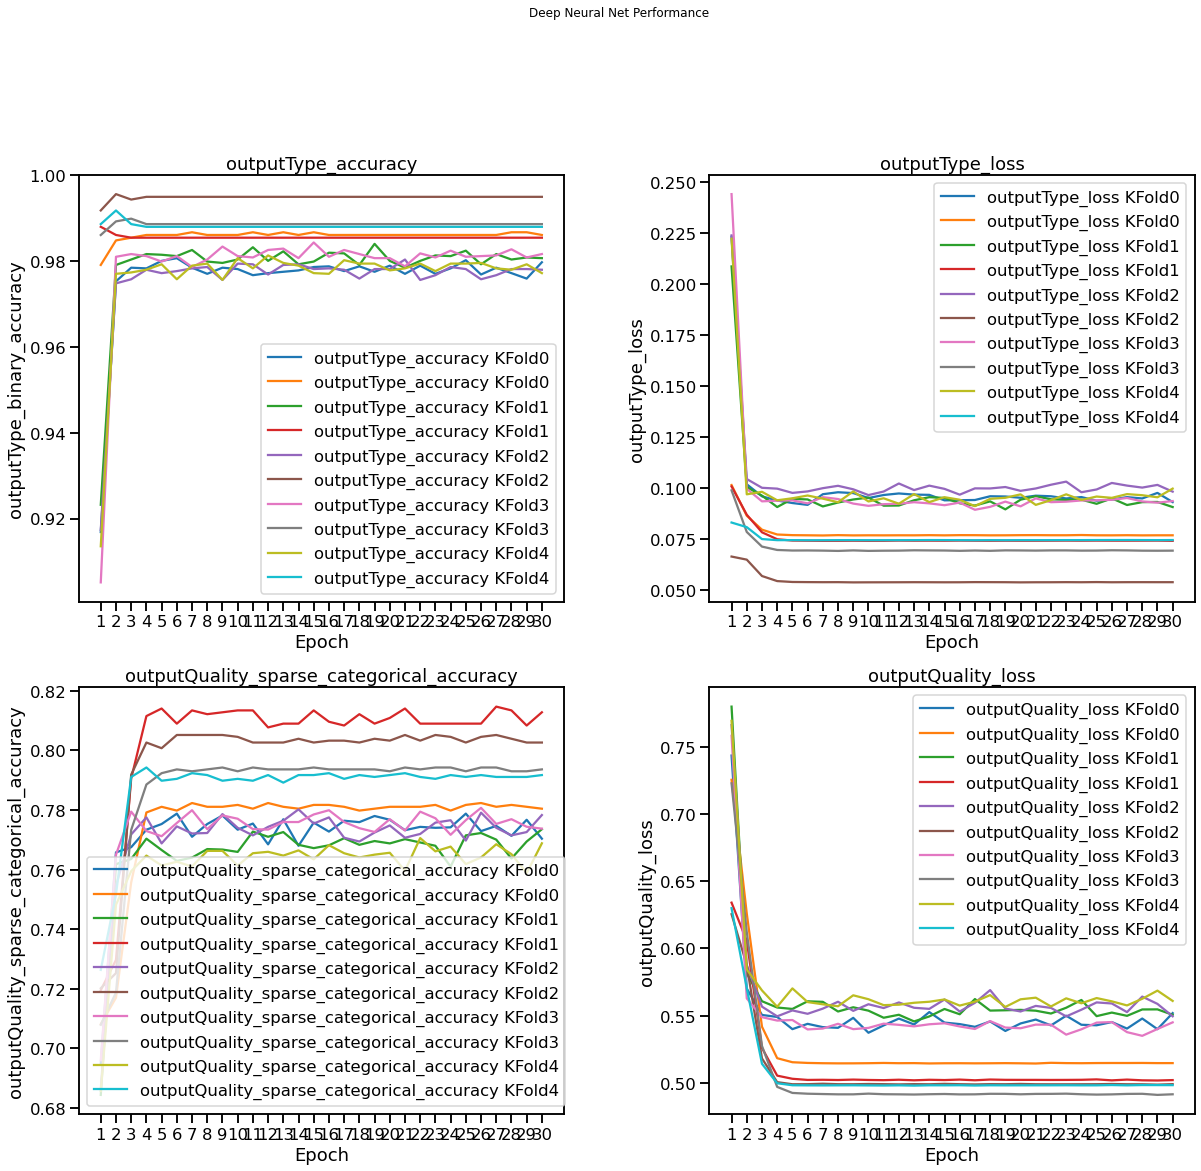

In [1401]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(20, 18))
t = fig.suptitle('Deep Neural Net Performance', fontsize=12)
fig.subplots_adjust(top=0.85, wspace=0.3)

epochs = list(range(1,epoch_set+1))
for i in range(len(history)):
    label="outputType_accuracy KFold"+ str(i)
    ax1.plot(epochs, history[i].history['outputType_binary_accuracy'], label=label)
    ax1.plot(epochs, history[i].history['val_outputType_binary_accuracy'], label=label)
    ax1.set_xticks(epochs)
    #ax1.set_ylim([0,1])
    ax1.set_ylabel('outputType_binary_accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_title('outputType_accuracy')
    l1 = ax1.legend(loc="best")
    
    label="outputType_loss KFold"+ str(i)

    ax2.plot(epochs, history[i].history['outputType_loss'], label=label)
    ax2.plot(epochs, history[i].history['val_outputType_loss'], label=label)

    #ax2.set_ylim([0,1])
    ax2.set_xticks(epochs)
    ax2.set_ylabel('outputType_loss')
    ax2.set_xlabel('Epoch')
    ax2.set_title('outputType_loss')
    l2 = ax2.legend(loc="best")


#for i in range(len(history)):    
    label="outputQuality_sparse_categorical_accuracy KFold"+ str(i)
    ax3.plot(epochs, history[i].history['outputQuality_sparse_categorical_accuracy'], label=label)
    ax3.plot(epochs, history[i].history['val_outputQuality_sparse_categorical_accuracy'], label=label)

    #ax3.set_ylim([0,1])
    ax3.set_xticks(epochs)
    ax3.set_ylabel('outputQuality_sparse_categorical_accuracy')
    ax3.set_xlabel('Epoch')
    ax3.set_title('outputQuality_sparse_categorical_accuracy')
    l2 = ax3.legend(loc="best")
    
    label="outputQuality_loss KFold"+ str(i)
    ax4.plot(epochs, history[i].history['outputQuality_loss'], label=label)
    ax4.plot(epochs, history[i].history['val_outputQuality_loss'], label=label)

    #ax4.set_ylim([0,1])
    ax4.set_xticks(epochs)
    ax4.set_ylabel('outputQuality_loss')
    ax4.set_xlabel('Epoch')
    ax4.set_title('outputQuality_loss')
    l2 = ax4.legend(loc="best")
    
#The code below attempt to present less clutttered "averge" picture of the training and validation result.




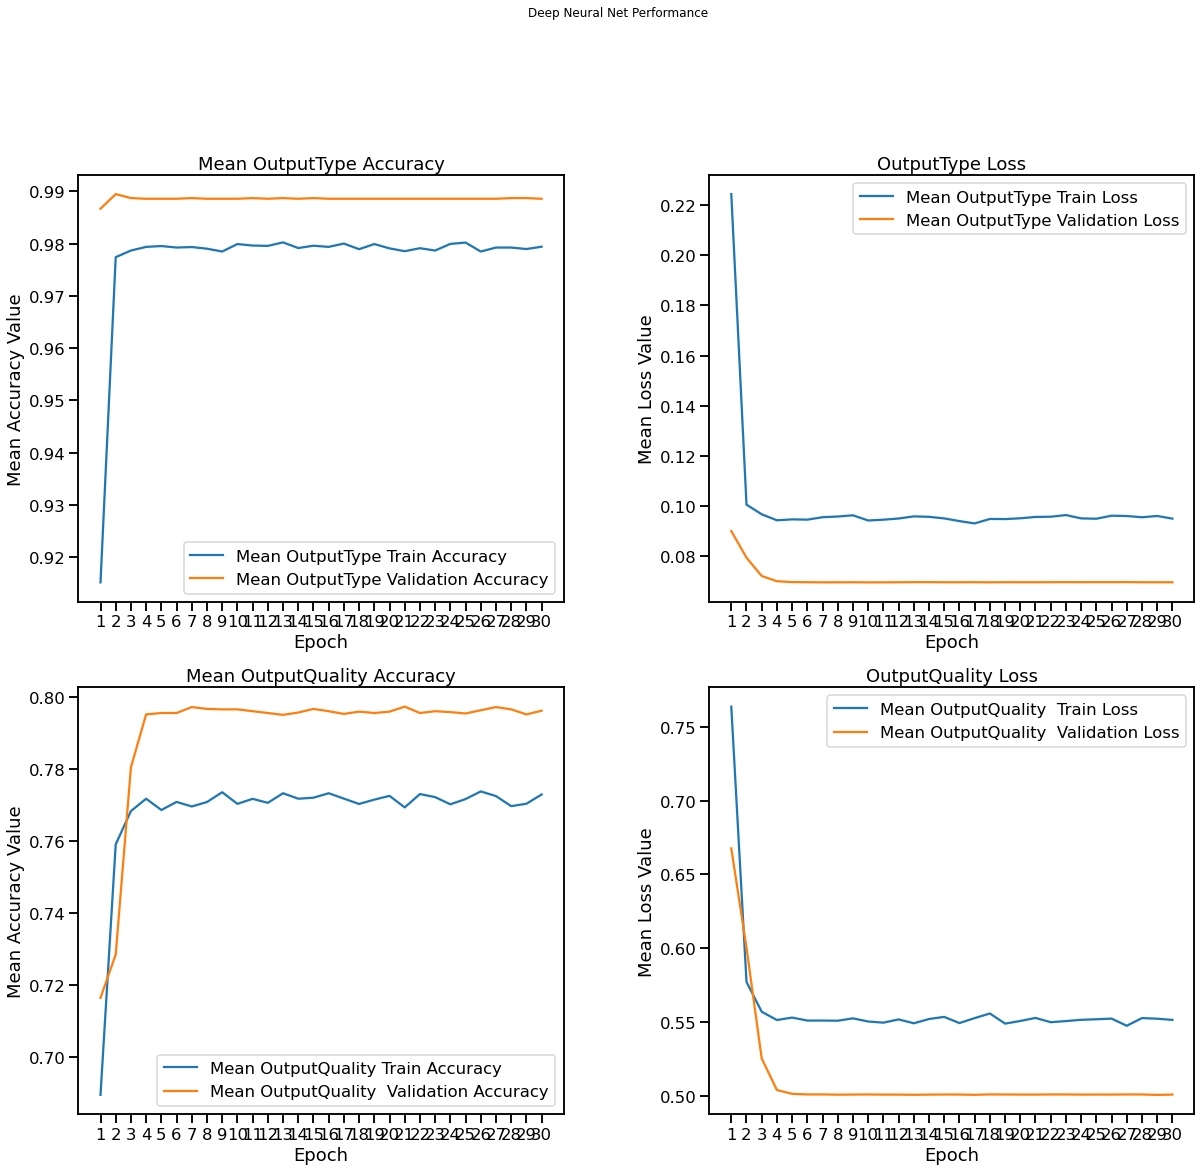

In [1402]:
sca1=[]
vsca1=[]
l1=[]
vl1=[]

sca2=[]
vsca2=[]
l2=[]
vl2=[]

for i in range(len(history)):
    
    sca1.append(np.array(history[i].history['outputType_binary_accuracy']))
    vsca1.append(np.array(history[i].history['val_outputType_binary_accuracy']))
    l1.append(np.array(history[i].history['outputType_loss']))
    vl1.append(np.array(history[i].history['val_outputType_loss']))
    
    
    sca2.append(np.array(history[i].history['outputQuality_sparse_categorical_accuracy']))
    vsca2.append(np.array(history[i].history['val_outputQuality_sparse_categorical_accuracy']))
    l2.append(np.array(history[i].history['outputQuality_loss']))
    vl2.append(np.array(history[i].history['val_outputQuality_loss']))
    
sca1=np.average(sca1,axis=0)
vsca1=np.average(vsca1,axis=0)
l1=np.average(l1,axis=0)
vl1=np.average(vl1,axis=0)

sca2=np.average(sca2,axis=0)
vsca2=np.average(vsca2,axis=0)
l2=np.average(l2,axis=0)
vl2=np.average(vl2,axis=0)


epochs = list(range(1,epoch_set+1))


#plot out the learning curve for each K-fold.

fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(20, 18))
t = fig.suptitle('Deep Neural Net Performance', fontsize=12)
fig.subplots_adjust(top=0.85, wspace=0.3)

label="outputType_accuracy KFold"
ax1.plot(epochs, sca1, label='Mean OutputType Train Accuracy' )
ax1.plot(epochs, vsca1, label='Mean OutputType Validation Accuracy')
ax1.set_xticks(epochs)
#ax1.set_ylim([0,1])
ax1.set_ylabel('Mean Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Mean OutputType Accuracy')
le1 = ax1.legend(loc="best")

label="OutputType Loss KFold"
ax2.plot(epochs, l1, label='Mean OutputType Train Loss')
ax2.plot(epochs, vl1, label='Mean OutputType Validation Loss')
ax2.set_xticks(epochs)
#ax2.set_ylim([0,1])
ax2.set_ylabel('Mean Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('OutputType Loss')
le2 = ax2.legend(loc="best")

label="OutputQuality Accuracy KFold"

ax3.plot(epochs, sca2, label='Mean OutputQuality Train Accuracy' )
ax3.plot(epochs, vsca2, label='Mean OutputQuality  Validation Accuracy')
ax3.set_xticks(epochs)
#ax3.set_ylim([0,1])
ax3.set_ylabel('Mean Accuracy Value')
ax3.set_xlabel('Epoch')
ax3.set_title('Mean OutputQuality Accuracy')
le3 = ax3.legend(loc="best")

label="OutputQuality Loss KFold"
ax4.plot(epochs, l2, label='Mean OutputQuality  Train Loss')
ax4.plot(epochs, vl2, label='Mean OutputQuality  Validation Loss')
ax4.set_xticks(epochs)
#ax4.set_ylim([0,1])
ax4.set_ylabel('Mean Loss Value')
ax4.set_xlabel('Epoch')
ax4.set_title('OutputQuality Loss')
le4 = ax4.legend(loc="best")

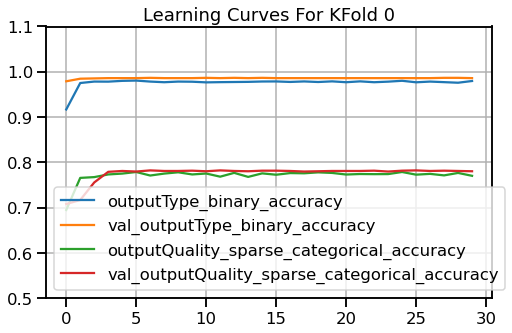

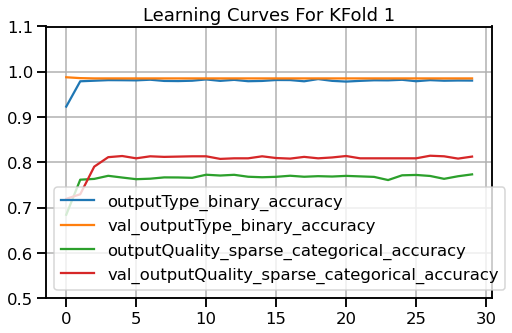

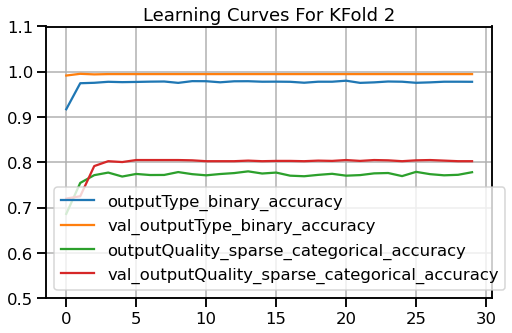

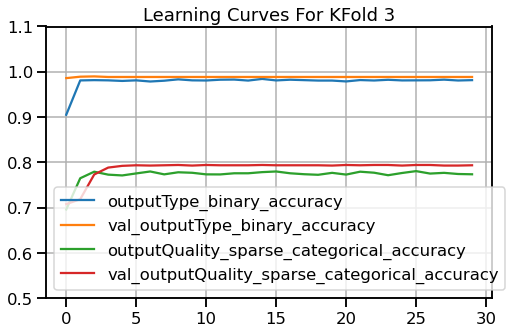

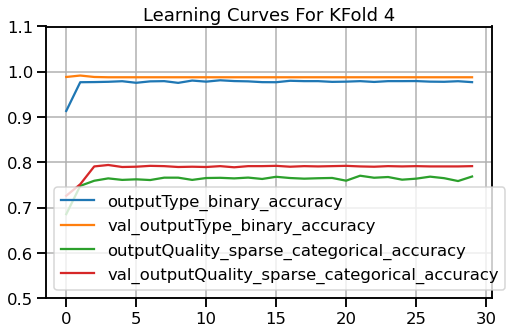

In [1403]:

for i in range(len(history)):

     #pd.DataFrame(history[i].history).plot(figsize=(8, 5))
        
     pd.DataFrame(history[i].history)[['outputType_binary_accuracy','val_outputType_binary_accuracy','outputQuality_sparse_categorical_accuracy','val_outputQuality_sparse_categorical_accuracy']].plot(figsize=(8, 5))
     plt.title('Learning Curves For KFold '+ str(i))
     plt.grid(True)
     plt.gca().set_ylim(.5, 1.1) # set the vertical range to [0-1]
     plt.show()

#### Evaluate The Performance

**Input 1 :**
X_1_smote_train,y_1_smote_train, X_1_test_scaled,y_1_test


**Input 2 :**
X_2_smote_train,y_2_smote_train, X_2_test_scaled, y_2_test

In [1404]:
model.evaluate([ X_1_test_scaled,X_2_test_scaled],[y_1_test,y_2_test])

41/41 [==============================] - 0s 654us/step - loss: 0.7904 - outputType_loss: 0.0783 - outputQuality_loss: 0.6119 - outputType_binary_accuracy: 0.9846 - outputType_sparse_categorical_accuracy: 0.7377 - outputQuality_binary_accuracy: 0.2736 - outputQuality_sparse_categorical_accuracy: 0.7254


[0.790431559085846,
 0.07834527641534805,
 0.6119188666343689,
 0.9846153855323792,
 0.7376922965049744,
 0.27358973026275635,
 0.7253845930099487]

In [1405]:
from sklearn.metrics import confusion_matrix, f1_score, cohen_kappa_score,classification_report
y_pred_1,y_pred_2 = model.predict([ X_1_test_scaled,X_2_test_scaled])

In [1406]:
display(y_pred_1.shape, y_pred_2.shape)

(1300, 1)

(1300, 3)

In [1407]:
#y_pred_2 is contains the class probabilities of each class for each examples. 
#need to convert to class prediction

y_pred_2_class=[np.argmax(i) for i in y_pred_2]
y_pred_2_class[0:5]

[2, 1, 1, 1, 1]

In [1408]:
#convert y_pred_1 into class labels.
display(y_pred_1[0:5])
y_pred_1_class=[1 if i>0.5 else 0 for i in y_pred_1]
y_pred_1_class[0:5]

array([[0.00264186],
       [0.81869924],
       [0.00828758],
       [0.00359356],
       [0.00804576]], dtype=float32)

[0, 1, 0, 0, 0]

### Evaluate Model's Classification Performance For Wine Quality 

In [1409]:
confusion_matrix(y_2_test, y_pred_2_class)



array([[ 18,  31,   0],
       [101, 851,  47],
       [  1, 177,  74]])

In [1410]:
def plot_consfusionmatrix(actual,predict):
    cm = confusion_matrix(actual, predict)
    sns.set_context('talk')
    ax = sns.heatmap(cm, annot=True, fmt='d')
    labels = ['low', 'average','good']
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    #print(cm)
    print('Confusion Matrxi Of Test Set:') 



Confusion Matrxi Of Test Set:
              precision    recall  f1-score   support

           0       0.15      0.37      0.21        49
           1       0.80      0.85      0.83       999
           2       0.61      0.29      0.40       252

    accuracy                           0.73      1300
   macro avg       0.52      0.50      0.48      1300
weighted avg       0.74      0.73      0.72      1300



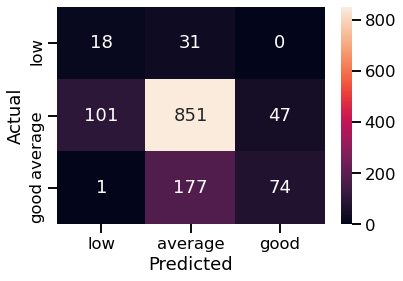

In [1411]:
plot_consfusionmatrix(y_2_test,y_pred_2_class) 
print(classification_report(y_2_test,y_pred_2_class))



### Evaluate Model's Classification Performance For Wine Type 


In [1412]:
def plot_consfusionmatrix_wineType(actual,predict):
    cm = confusion_matrix(actual, predict)
    sns.set_context('talk')
    ax = sns.heatmap(cm, annot=True, fmt='d')
    labels = ['White Wine','Red Wine']
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
    #print(cm)
    print('Confusion Matrxi Of Test Set:') 



Confusion Matrxi Of Test Set:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       959
           1       0.97      0.98      0.97       341

    accuracy                           0.98      1300
   macro avg       0.98      0.98      0.98      1300
weighted avg       0.98      0.98      0.98      1300



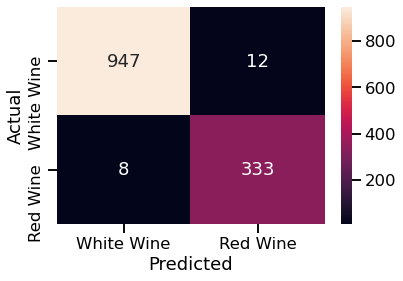

In [1413]:
confusion_matrix(y_1_test, y_pred_1_class)

plot_consfusionmatrix_wineType(y_1_test, y_pred_1_class) 
print(classification_report(y_1_test, y_pred_1_class))

In [1414]:
model.metrics_names

['loss',
 'outputType_loss',
 'outputQuality_loss',
 'outputType_binary_accuracy',
 'outputType_sparse_categorical_accuracy',
 'outputQuality_binary_accuracy',
 'outputQuality_sparse_categorical_accuracy']